In [2]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [3]:
df = pd.read_csv('data.csv' ,encoding='unicode_escape', date_parser='InvoiceDate')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# EDA 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [8]:
df.duplicated().sum()

5268

Adanya missing value 

adanya data yang duplicated

## Dealing missing value & duplicated data

In [9]:
df.dropna(subset='CustomerID',axis=0,inplace=True)

In [10]:
df.drop_duplicates(keep="first", inplace=True)

In [11]:
df=df[~df.InvoiceNo.str.contains('C',na=False)]

## Checking Outlier with boxplot

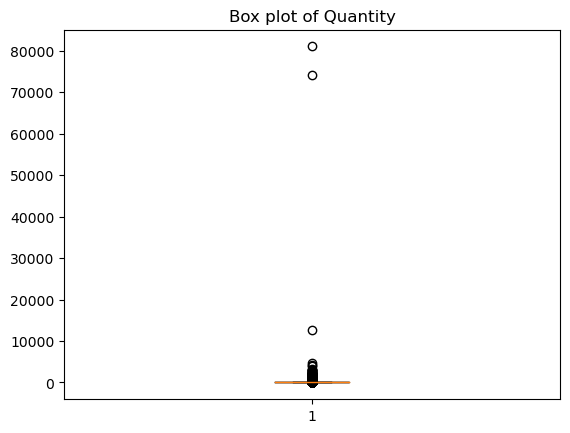

In [106]:
# Membuat box plot
plt.boxplot(df['Quantity'])
plt.title('Box plot of Quantity')
plt.show()


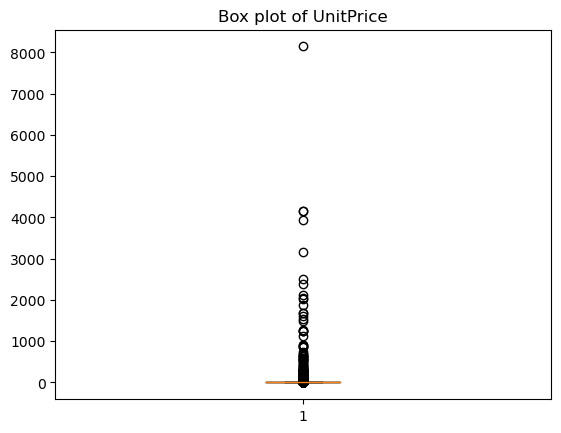

In [107]:
# Membuat box plot
plt.boxplot(df['UnitPrice'])
plt.title('Box plot of UnitPrice')
plt.show()

In [108]:
# # Menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
# Q1 = df['Quantity'].quantile(0.25)
# Q3 = df['Quantity'].quantile(0.75)
# IQR = Q3 - Q1

# # Mendefinisikan batas bawah dan batas atas
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# outliers = df[(df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound)]
# non_outliers = df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]

In [109]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [110]:
df[df['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/2011 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/2011 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/2011 10:25,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/2011 12:45,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,4/4/2011 14:42,0.0,14410.0,United Kingdom


# change type data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392732 non-null  object 
 1   StockCode    392732 non-null  object 
 2   Description  392732 non-null  object 
 3   Quantity     392732 non-null  int64  
 4   InvoiceDate  392732 non-null  object 
 5   UnitPrice    392732 non-null  float64
 6   CustomerID   392732 non-null  float64
 7   Country      392732 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


In [13]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [14]:
df['Description'] = df['Description'].str.strip()

In [15]:
df['InvoiceNo'] = pd.to_numeric(df['InvoiceNo'])

In [16]:
df['CustomerID'] = df['CustomerID'].astype(int).astype(str)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  int64         
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  object        
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


# Feature Engineering

In [18]:
df['Profit']=df.Quantity*df.UnitPrice

In [19]:
continent_mapping = {
    'United Kingdom': 'Europe',
    'France': 'Europe',
    'Australia': 'Oceania',
    'Netherlands': 'Europe',
    'Germany': 'Europe',
    'Norway': 'Europe',
    'EIRE': 'Europe',
    'Switzerland': 'Europe',
    'Spain': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Italy': 'Europe',
    'Belgium': 'Europe',
    'Lithuania': 'Europe',
    'Japan': 'Asia',
    'Iceland': 'Europe',
    'Channel Islands': 'Europe',
    'Denmark': 'Europe',
    'Cyprus': 'Europe',
    'Sweden': 'Europe',
    'Finland': 'Europe',
    'Austria': 'Europe',
    'Greece': 'Europe',
    'Singapore': 'Asia',
    'Lebanon': 'Asia',
    'United Arab Emirates': 'Asia',
    'Israel': 'Asia',
    'Saudi Arabia': 'Asia',
    'Czech Republic': 'Europe',
    'Canada': 'North America',
    'Unspecified': 'Unknown',
    'Brazil': 'South America',
    'USA': 'North America',
    'European Community': 'Europe',
    'Bahrain': 'Asia',
    'Malta': 'Europe',
    'RSA': 'Africa'
}

df['Continent'] = df['Country'].map(continent_mapping)

In [20]:
df['Hour'] = df['InvoiceDate'].dt.hour
df['Day'] = df['InvoiceDate'].dt.day
df['Dayname'] = df['InvoiceDate'].dt.day_name()
df['Month'] = df['InvoiceDate'].dt.month
df['NameMonth'] = df['InvoiceDate'].dt.strftime('%B')
df['Quarter'] = 'Q' + df['InvoiceDate'].dt.quarter.astype(str)
df['Year'] = df['InvoiceDate'].dt.year

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  int64         
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  object        
 7   Country      392732 non-null  object        
 8   Profit       392732 non-null  float64       
 9   Continent    392732 non-null  object        
 10  Hour         392732 non-null  int64         
 11  Day          392732 non-null  int64         
 12  Dayname      392732 non-null  object        
 13  Month        392732 non-null  int64         
 14  NameMonth    392732 non-null  object        
 15  Quarter      392732 non-null  obje

# RFM

In [22]:
current_day = df['InvoiceDate'].max() + pd.Timedelta(days=1) # membuat variabel untuk 1 hari lebih dari tanggal terakhir dari dataset

In [23]:
#recency
recency = df.groupby(['CustomerID']).agg({"InvoiceDate":lambda x:((current_day-x.max()).days)})

In [24]:
recency

,InvoiceDate
CustomerID,
12346,326
12347,2
12348,75
12349,19
12350,310
...,...
18280,278
18281,181
18282,8


In [25]:
#Frequency
frecuency = df.drop_duplicates(subset="InvoiceNo").groupby(["CustomerID"])[["InvoiceNo"]].count()

In [26]:
frecuency

,InvoiceNo
CustomerID,
12346,1
12347,7
12348,4
12349,1
12350,1
...,...
18280,1
18281,1
18282,2


In [27]:
#Monetary
monetary = df.groupby(["CustomerID"])[["Profit"]].sum()

In [28]:
RFM = pd.concat([recency,frecuency,monetary],axis=1)

In [29]:
RFM.rename(columns={"InvoiceDate": "Recency","InvoiceNo": "Frequency","Profit": "Monetary"}, inplace=True)

In [30]:
# #create segment new customer
# RFM['Category'] = RFM.apply(lambda x: "new" if x['Recency'] <= 30 and x['Frequency'] == 1 else "old", axis=1)

In [31]:
RFM

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,77183.60
12347,2,7,4310.00
12348,75,4,1797.24
12349,19,1,1757.55
12350,310,1,334.40
...,...,...,...
18280,278,1,180.60
18281,181,1,80.82
18282,8,2,178.05


# Clustering with K-Prototype

## Prepare Dataset RFM di scaled

In [132]:
# cat_code = np.array(RFM['Category'].astype('category').cat.codes)

In [133]:
# RFM.select_dtypes('number').columns

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(RFM[['Recency', 'Frequency', 'Monetary']])

In [33]:
scaled

array([[ 2.33485829e+00, -4.24674873e-01,  8.36397668e+00],
       [-9.05199314e-01,  3.54080191e-01,  2.51778965e-01],
       [-1.75186336e-01, -3.52973410e-02, -2.79383250e-02],
       ...,
       [-8.45198247e-01, -2.94882363e-01, -2.08184524e-01],
       [-8.85198958e-01,  1.52221279e+00, -2.98993684e-04],
       [-4.95192025e-01, -1.65089852e-01, -2.34811224e-02]])

In [41]:
# cat_code = cat_code[:, np.newaxis]

In [42]:
# cat_code

In [43]:
# RFM_Scaled = np.concatenate((scaled, cat_code), axis=1)

In [34]:
RFM_Scaled = scaled

In [35]:
RFM_Scaled

array([[ 2.33485829e+00, -4.24674873e-01,  8.36397668e+00],
       [-9.05199314e-01,  3.54080191e-01,  2.51778965e-01],
       [-1.75186336e-01, -3.52973410e-02, -2.79383250e-02],
       ...,
       [-8.45198247e-01, -2.94882363e-01, -2.08184524e-01],
       [-8.85198958e-01,  1.52221279e+00, -2.98993684e-04],
       [-4.95192025e-01, -1.65089852e-01, -2.34811224e-02]])

## mencari n cluster dengan data yang sudah di scaled menggunakan elbow dan algoritma K prototype

In [136]:
from kmodes.kprototypes import KPrototypes
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [47]:
score = []
for n in tqdm(range(2,8)):
    model = KPrototypes(n_clusters=n)
    member = model.fit(RFM_Scaled, categorical=[3])
    score.append(model.cost_)

plt.figure(figsize=(10,5))
plt.plot(range(2,8), score, "r-")
plt.xlabel("n_clusters")

  0%|          | 0/6 [00:00<?, ?it/s]

AssertionError: Categorical index larger than number of columns.

Dapat terlihat bahwa penurunan biaya signifikan terjadi antara 2 dan 3 cluster, dan kemudian penurunannya melambat. Dengan memperhatikan grafik yang Anda plot, Anda harus memilih jumlah cluster di mana penurunan biaya tidak terlalu signifikan lagi. Dalam hal ini, 4 atau 5 cluster mungkin menjadi pilihan yang baik.

In [ ]:
score

### evaluasi menggunakan silhoutte

In [ ]:
RFM_Scaled

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
score = []
for n in tqdm(range(2,10)):
    model = KPrototypes(n_clusters=n)
    member = model.fit_predict(RFM_Scaled, categorical=[3])
    siluet =  silhouette_score(RFM_Scaled, member, metric='euclidean')
    
    score.append(siluet)

plt.figure(figsize=(10,5))
plt.plot(range(2,10), score, "r-")
plt.ylabel("Silhouette")
plt.xlabel("n_clusters")

peningkatan score terjadi di 4 cluster jadi n cluster yang optimal berdasarkan silhouette score adalah 4 cluster

In [ ]:
score

## hitung n cluster menggunakan k means metode elbow 

In [137]:
from sklearn.cluster import KMeans

In [ ]:
score = []
for n in range(2,15):
    kmeans = KMeans(n_clusters=n)
    member = kmeans.fit_predict(RFM_Scaled)
    
    score.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(2,15), score, "r-")
plt.ylabel("Inertia")
plt.xlabel("n_clusters")

In [ ]:
score = []
for n in range(2,10):
    kmeans = KMeans(n_clusters=n)
    member = kmeans.fit_predict(RFM_Scaled)
    
    siluet =  silhouette_score(RFM_Scaled, member, metric='euclidean')
    
    score.append(siluet)

plt.figure(figsize=(10,5))
plt.plot(range(2,10), score, "r-")
plt.ylabel("Silhouette")
plt.xlabel("n_clusters")

In [ ]:
score

## training cluster

In [138]:
model = KMeans(n_clusters=4, random_state=42)
member = model.fit_predict(RFM_Scaled)

In [139]:
RFM_pred = RFM.copy()
RFM_pred["cluster"] = member
RFM_pred

,Recency,Frequency,Monetary,cluster
CustomerID,,,,
12346,326,1,77183.60,3
12347,2,7,4310.00,0
12348,75,4,1797.24,0
12349,19,1,1757.55,0
12350,310,1,334.40,2
...,...,...,...,...
18280,278,1,180.60,2
18281,181,1,80.82,2
18282,8,2,178.05,0


# Analize Cluster

In [140]:
RFM_pred.groupby(["cluster"])[["Recency","Frequency","Monetary"]].mean()

,Recency,Frequency,Monetary
cluster,,,
0,43.692962,3.682160,1353.182227
1,7.384615,82.692308,127187.959231
2,248.075914,1.552015,478.848773
3,15.500000,22.333333,12690.500392


In [141]:
RFM_pred.describe()

,Recency,Frequency,Monetary,cluster
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,92.518322,4.271952,2048.215924,0.635861
std,100.009747,7.705493,8984.248352,1.002838
min,1.000000,1.000000,0.000000,0.000000
25%,18.000000,1.000000,306.455000,0.000000
50%,51.000000,2.000000,668.560000,0.000000
75%,142.000000,5.000000,1660.315000,2.000000
max,374.000000,210.000000,280206.020000,3.000000


In [142]:
RFM_pred.groupby(["cluster"])[["Recency","Frequency","Monetary"]].mean()

,Recency,Frequency,Monetary
cluster,,,
0,43.692962,3.682160,1353.182227
1,7.384615,82.692308,127187.959231
2,248.075914,1.552015,478.848773
3,15.500000,22.333333,12690.500392


In [144]:
segment_cluster = {
    0:'Silver',
    1:'Platinum',
    2:'Bronze',
    3:'Gold'
}

In [145]:
RFM_pred['cluster'] = RFM_pred['cluster'].map(segment_cluster)

In [146]:
RFM_pred[RFM_pred['cluster'] == 'Platinum']

,Recency,Frequency,Monetary,cluster
CustomerID,,,,
12415,24,21,124914.53,Platinum
12748,1,210,33053.19,Platinum
13089,3,97,58762.08,Platinum
14156,10,55,117210.08,Platinum
14646,2,74,280206.02,Platinum
14911,1,201,143711.17,Platinum
15311,1,91,60632.75,Platinum
16029,39,63,80850.84,Platinum
16446,1,2,168472.50,Platinum


1. Cluster Silver: Pelanggan Baru atau Kurang Aktif
- Karakteristik

    - Recency (43.87): Rata-rata pelanggan terakhir kali bertransaksi sekitar 44 hari yang lalu. Ini menunjukkan bahwa mereka masih relatif baru atau mungkin baru kembali bertransaksi setelah periode ketidakaktifan.
    - Frequency (3.66): Rata-rata pelanggan dalam cluster ini bertransaksi sekitar 3-4 kali. Ini menunjukkan bahwa mereka belum terlalu sering bertransaksi.
    - Monetary (1345.42): Rata-rata pengeluaran pelanggan di cluster ini adalah sekitar 1345.42. Ini menunjukkan bahwa meskipun frekuensi transaksi rendah, jumlah yang dibelanjakan cukup signifikan.
    
- Strategi
    - Promosi dan Diskon Awal:
        - Berikan diskon khusus atau promosi kepada pelanggan baru atau yang kembali setelah lama tidak aktif untuk mendorong transaksi lebih lanjut.
        - Contoh: "Diskon 20% untuk pembelian berikutnya" atau "Beli 2, gratis 1".
     - Email Marketing dan Rekomendasi Produk:
        - Kirim email yang berisi rekomendasi produk berdasarkan pembelian sebelumnya atau produk populer.
        - Contoh: "Anda mungkin menyukai produk ini..." atau "Produk terlaris minggu ini".
     - Program Loyalitas:
        - Mulai memperkenalkan program loyalitas yang memberikan poin atau hadiah untuk setiap pembelian.
        - Contoh: "Dapatkan poin setiap pembelian yang bisa ditukar dengan diskon atau hadiah".
    
    
2. Cluster Gold: Pelanggan Setia dengan Pembelanjaan Tinggi
- Karakteristik
    - Recency (15.64): Rata-rata pelanggan terakhir kali bertransaksi sekitar 16 hari yang lalu. Mereka sering bertransaksi.
    - Frequency (22.09): Rata-rata pelanggan dalam cluster ini bertransaksi sekitar 22 kali. Ini menunjukkan loyalitas yang tinggi.
    - Monetary (12463.81): Rata-rata pengeluaran pelanggan di cluster ini adalah sekitar 12463.81. Mereka menghabiskan banyak uang dan merupakan pelanggan bernilai tinggi.    

- Strategi untuk Meningkatkan Profit
    - Program Penghargaan dan Loyalitas:

        - Tingkatkan program loyalitas dengan memberikan penghargaan eksklusif atau keuntungan tambahan.
        - Contoh: "Akses eksklusif ke penjualan awal" atau "Bonus poin ganda di bulan ulang tahun".
    - Penawaran Produk Premium:

        - Tawarkan produk premium atau bundling dengan harga spesial yang bisa meningkatkan nilai transaksi.
        - Contoh: "Bundle eksklusif dengan diskon 10%" atau "Produk premium terbaru".
    - Umpan Balik dan Personalisasi:

        - Minta umpan balik untuk meningkatkan layanan dan sesuaikan penawaran berdasarkan preferensi individu.
        - Contoh: "Kami ingin mendengar pendapat Anda..." atau "Rekomendasi produk khusus untuk Anda".
    
3. Cluster Platinum: Pelanggan Paling Berharga (VIP)
- Karakteristik
    - Recency (7.38): Rata-rata pelanggan terakhir kali bertransaksi sekitar 7 hari yang lalu. Mereka sangat sering bertransaksi.
    - Frequency (82.69): Rata-rata pelanggan dalam cluster ini bertransaksi sekitar 83 kali. Ini menunjukkan frekuensi yang sangat tinggi.
    - Monetary (127187.96): Rata-rata pengeluaran pelanggan di cluster ini adalah sekitar 127187.96. Mereka adalah pelanggan yang paling bernilai tinggi.
- Strategi untuk Meningkatkan Profit
    - Layanan dan Pengalaman Eksklusif:

        - Berikan layanan khusus seperti personal shopper atau akses VIP ke acara eksklusif.
        - Contoh: "Akses VIP ke peluncuran produk" atau "Layanan personal shopper gratis".
    - Penawaran Produk Terbatas:

        - Tawarkan produk edisi terbatas atau koleksi khusus yang tidak tersedia untuk pelanggan lain.
        - Contoh: "Edisi terbatas hanya untuk anggota VIP" atau "Koleksi eksklusif terbaru".
    - Program VIP:

        - Kembangkan program VIP dengan keuntungan lebih seperti pengiriman gratis, hadiah ulang tahun, atau diskon khusus.
        - Contoh: "Pengiriman gratis untuk semua pesanan" atau "Hadiah ulang tahun eksklusif".
    
    
4. Cluster Bronze: Pelanggan Tidak Aktif atau Berisiko Churn
- Karakteristik
    - Recency (248.47): Rata-rata pelanggan terakhir kali bertransaksi sekitar 248 hari yang lalu. Mereka sudah lama tidak bertransaksi.
    - Frequency (1.55): Rata-rata pelanggan dalam cluster ini bertransaksi sekitar 1-2 kali. Ini menunjukkan frekuensi transaksi yang sangat rendah.
    - Monetary (478.65): Rata-rata pengeluaran pelanggan di cluster ini adalah sekitar 478.65. Mereka menghabiskan sedikit uang dibandingkan dengan cluster lainnya.

- Strategi untuk Meningkatkan Profit
    - Kampanye Reaktivasi:

        - Kirim kampanye reaktivasi dengan penawaran khusus untuk menarik mereka kembali.
        - Contoh: "Diskon 30% untuk kembali berbelanja" atau "Hadiah gratis dengan pembelian pertama Anda setelah lama tidak aktif".
    - Survey Kepuasan Pelanggan:

        - Lakukan survey untuk memahami alasan ketidakaktifan dan tawarkan solusi atau penawaran yang relevan.
        - Contoh: "Apa yang bisa kami perbaiki?" atau "Diskon 20% sebagai ucapan terima kasih atas umpan balik Anda".
    - Follow-Up Personal:

        - Lakukan follow-up personal melalui email atau telepon untuk mengetahui kebutuhan mereka dan menawarkan bantuan.
        - Contoh: "Kami merindukan Anda! Ada yang bisa kami bantu?" atau "Diskon khusus untuk menyambut Anda kembali".


In [147]:
import plotly.express as px

In [148]:
fig = px.scatter_3d(RFM_pred, x='Recency', y='Frequency', z='Monetary', color='cluster', 
                    title='3D Scatter Plot of Customer Segments',
                    labels={'Recency': 'Recency (days)', 'Frequency': 'Frequency', 'Monetary': 'Monetary Value'},
                    opacity=0.8)

# Menampilkan plot
fig.show()

In [149]:
import plotly.graph_objects as go

# Menghitung nilai rata-rata untuk setiap fitur dalam setiap kluster
cluster_avg = RFM_pred.groupby('cluster')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()

# Menyusun data untuk radar chart
categories = ['Recency', 'Frequency', 'Monetary']
fig = go.Figure()

for i, row in cluster_avg.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=[row['Recency'], row['Frequency'], row['Monetary'], row['Recency']],
        theta=categories + [categories[0]],
        fill='toself',
        name=row['cluster']
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, cluster_avg[categories].max().max()]
        )
    ),
    title="Radar Chart of Clusters"
)

fig.show()

In [150]:
def segment_customer_by_recency(days):
    if days < 30:
        return 'Active'
    elif days < 90:
        return 'Warm'
    elif days < 180:
        return 'Cool'
    else:
        return 'Inactive'

In [151]:
RFM_pred['SegmentRecency'] = RFM_pred['Recency'].apply(segment_customer_by_recency)

In [152]:
RFM_pred.cluster.value_counts()

Silver      3055
Bronze      1067
Gold         204
Platinum      13
Name: cluster, dtype: int64

In [153]:
RFM_pred.SegmentRecency.value_counts()

Active      1608
Warm        1273
Inactive     865
Cool         593
Name: SegmentRecency, dtype: int64

In [154]:
RFM_pred

,Recency,Frequency,Monetary,cluster,SegmentRecency
CustomerID,,,,,
12346,326,1,77183.60,Gold,Inactive
12347,2,7,4310.00,Silver,Active
12348,75,4,1797.24,Silver,Warm
12349,19,1,1757.55,Silver,Active
12350,310,1,334.40,Bronze,Inactive
...,...,...,...,...,...
18280,278,1,180.60,Bronze,Inactive
18281,181,1,80.82,Bronze,Inactive
18282,8,2,178.05,Silver,Active


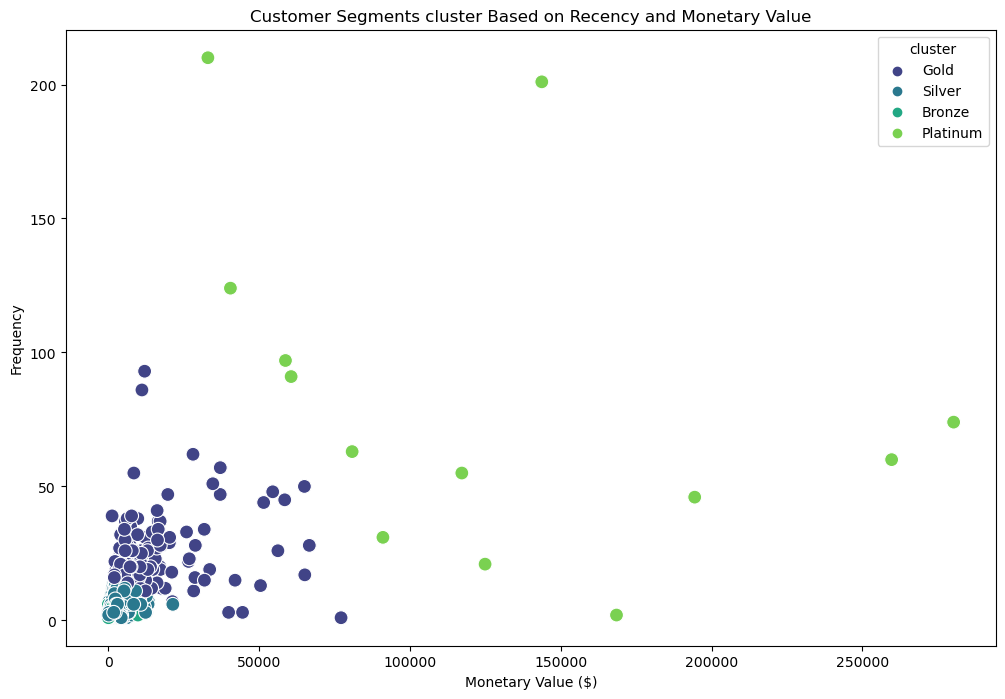

In [155]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=RFM_pred, x='Monetary', y='Frequency', hue='cluster', palette='viridis', s=100)
plt.title('Customer Segments cluster Based on Recency and Monetary Value')
plt.xlabel('Monetary Value ($)')
plt.ylabel('Frequency')
plt.legend(title='cluster')
plt.show()

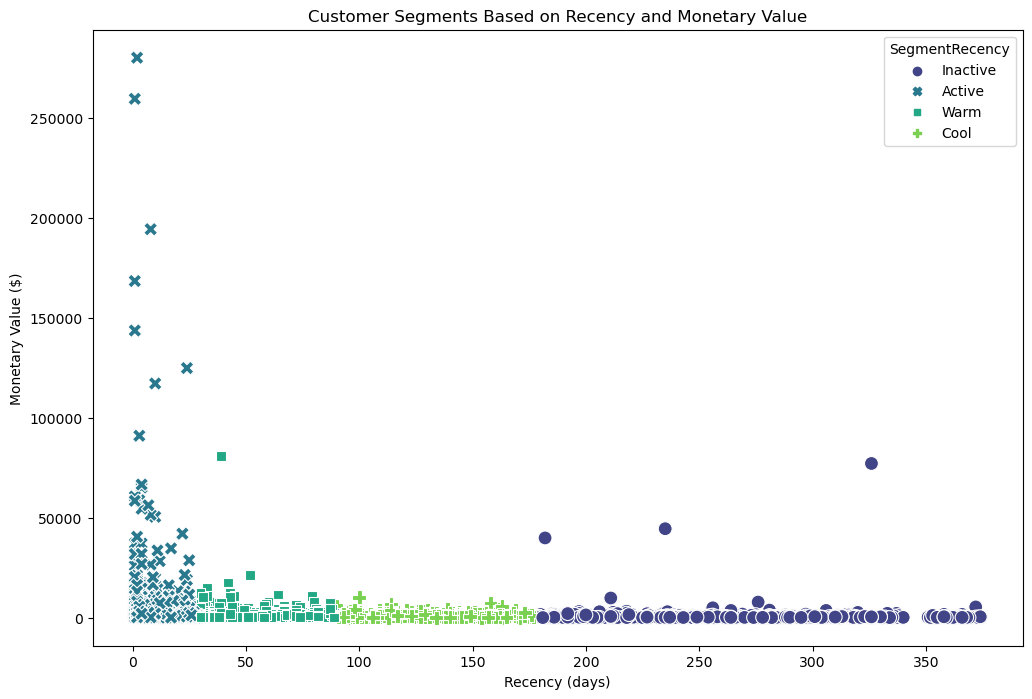

In [156]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=RFM_pred, x='Recency', y='Monetary', hue='SegmentRecency', palette='viridis', style='SegmentRecency', s=100)
plt.title('Customer Segments Based on Recency and Monetary Value')
plt.xlabel('Recency (days)')
plt.ylabel('Monetary Value ($)')
plt.legend(title='SegmentRecency')
plt.show()

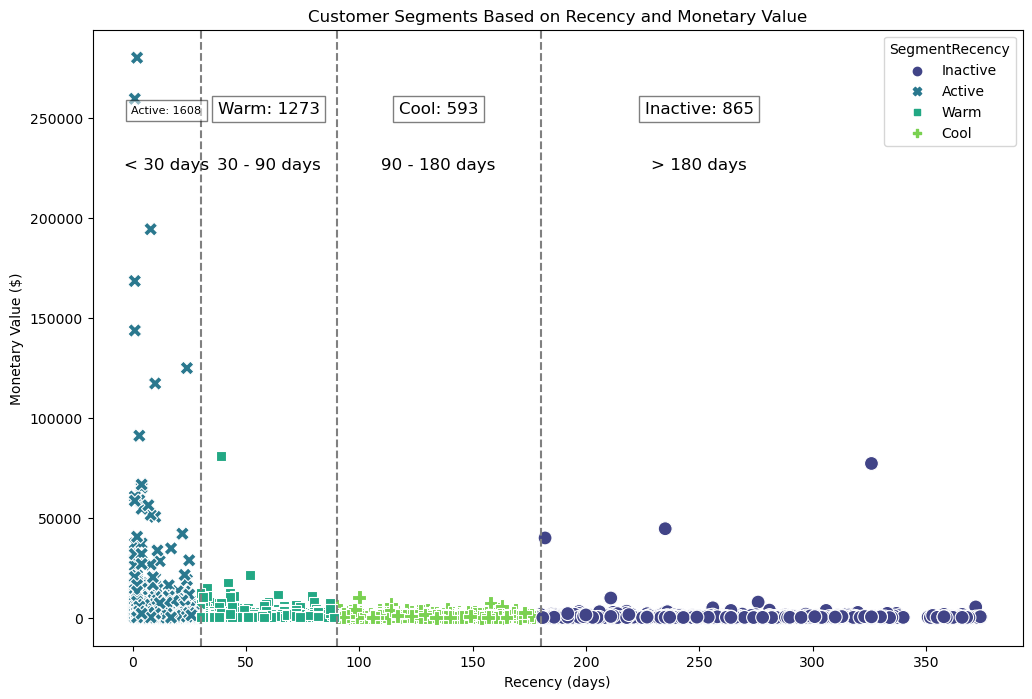

In [157]:
# Visualisasi hasil segmentasi
plt.figure(figsize=(12, 8))
sns.scatterplot(data=RFM_pred, x='Recency', y='Monetary', hue='SegmentRecency', palette='viridis', style='SegmentRecency', s=100)

# Menambahkan garis untuk membedakan segmen
plt.axvline(x=30, color='grey', linestyle='--')
plt.axvline(x=90, color='grey', linestyle='--')
plt.axvline(x=180, color='grey', linestyle='--')


# Menambahkan jarak garis untuk setiap segmen
plt.annotate('< 30 days', xy=(15, max(RFM_pred['Monetary']) * 0.8), color='black', ha='center', fontsize=12)
plt.annotate('30 - 90 days', xy=(60, max(RFM_pred['Monetary']) * 0.8), color='black', ha='center', fontsize=12)
plt.annotate('90 - 180 days', xy=(135, max(RFM_pred['Monetary']) * 0.8), color='black', ha='center', fontsize=12)
plt.annotate('> 180 days', xy=(250, max(RFM_pred['Monetary']) * 0.8), color='black', ha='center', fontsize=12)

segments = RFM_pred['SegmentRecency'].value_counts()
plt.text(15, max(RFM_pred['Monetary']) * 0.9, f'Active: {segments["Active"]}', color='black', ha='center', fontsize=8, bbox=dict(facecolor='white', alpha=0.5))
plt.text(60, max(RFM_pred['Monetary']) * 0.9, f'Warm: {segments["Warm"]}', color='black', ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.text(135, max(RFM_pred['Monetary']) * 0.9, f'Cool: {segments.get("Cool", 0)}', color='black', ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.text(250, max(RFM_pred['Monetary']) * 0.9, f'Inactive: {segments["Inactive"]}', color='black', ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))


plt.title('Customer Segments Based on Recency and Monetary Value')
plt.xlabel('Recency (days)')
plt.ylabel('Monetary Value ($)')
plt.legend(title='SegmentRecency')
plt.show()

In [158]:
RFM_pred

,Recency,Frequency,Monetary,cluster,SegmentRecency
CustomerID,,,,,
12346,326,1,77183.60,Gold,Inactive
12347,2,7,4310.00,Silver,Active
12348,75,4,1797.24,Silver,Warm
12349,19,1,1757.55,Silver,Active
12350,310,1,334.40,Bronze,Inactive
...,...,...,...,...,...
18280,278,1,180.60,Bronze,Inactive
18281,181,1,80.82,Bronze,Inactive
18282,8,2,178.05,Silver,Active


In [159]:
num_Segment_cust= RFM_pred.groupby('SegmentRecency').size().reset_index(name='TotalCustomers')

In [160]:
 RFM_pred['SegmentRecency'].value_counts()

Active      1608
Warm        1273
Inactive     865
Cool         593
Name: SegmentRecency, dtype: int64

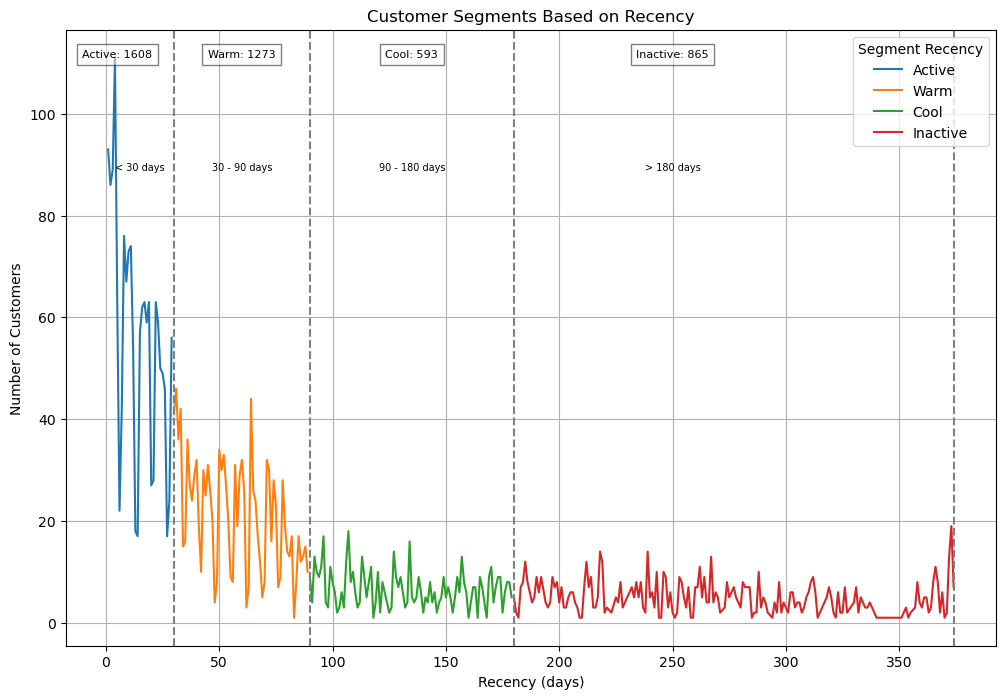

In [161]:
# Menghitung jumlah pelanggan per Recency dan SegmentRecency
line_chart_data = RFM_pred.groupby(['Recency', 'SegmentRecency']).size().reset_index(name='CustomerCount')

# Menghitung jumlah total pelanggan per SegmentRecency
total_segments = RFM_pred['SegmentRecency'].value_counts()

# Plot line chart
plt.figure(figsize=(12, 8))
sns.lineplot(data=line_chart_data, x='Recency', y='CustomerCount', hue='SegmentRecency')

# Menambahkan garis untuk membedakan setiap segment recency
plt.axvline(x=30, color='grey', linestyle='--')
plt.axvline(x=90, color='grey', linestyle='--')
plt.axvline(x=180, color='grey', linestyle='--')
plt.axvline(x=line_chart_data['Recency'].max(), color='grey', linestyle='--')

# Menambahkan jarak garis untuk setiap segmen
plt.annotate('< 30 days', xy=(15, max(line_chart_data['CustomerCount']) * 0.8), color='black', ha='center', fontsize=7)
plt.annotate('30 - 90 days', xy=(60, max(line_chart_data['CustomerCount']) * 0.8), color='black', ha='center', fontsize=7)
plt.annotate('90 - 180 days', xy=(135, max(line_chart_data['CustomerCount']) * 0.8), color='black', ha='center', fontsize=7)
plt.annotate('> 180 days', xy=(250, max(line_chart_data['CustomerCount']) * 0.8), color='black', ha='center', fontsize=7)


# Menambahkan anotasi jumlah total pelanggan untuk setiap segment recency
plt.text(5, max(line_chart_data['CustomerCount']) * 1, f'Active: {total_segments["Active"]}', color='black', ha='center', fontsize=8, bbox=dict(facecolor='white', alpha=0.5))
plt.text(60, max(line_chart_data['CustomerCount']) * 1, f'Warm: {total_segments["Warm"]}', color='black', ha='center', fontsize=8, bbox=dict(facecolor='white', alpha=0.5))
plt.text(135, max(line_chart_data['CustomerCount']) * 1, f'Cool: {total_segments.get("Cool", 0)}', color='black', ha='center', fontsize=8, bbox=dict(facecolor='white', alpha=0.5))
plt.text(250, max(line_chart_data['CustomerCount']) * 1, f'Inactive: {total_segments["Inactive"]}', color='black', ha='center', fontsize=8, bbox=dict(facecolor='white', alpha=0.5))


plt.title('Customer Segments Based on Recency')
plt.xlabel('Recency (days)')
plt.ylabel('Number of Customers')
plt.legend(title='Segment Recency')
plt.grid(True)
plt.show()

In [162]:
import plotly.express as px

In [163]:
# Menghitung jumlah pelanggan per Recency dan SegmentRecency
line_chart_data = RFM_pred.groupby(['Recency', 'SegmentRecency']).size().reset_index(name='CustomerCount')

# Menghitung jumlah total pelanggan per SegmentRecency
total_segments = RFM_pred['SegmentRecency'].value_counts().to_dict()

# Membuat line chart menggunakan Plotly
fig = px.line(line_chart_data, x='Recency', y='CustomerCount', color='SegmentRecency', title='Customer Segments Based on Recency')

# Menambahkan garis vertikal untuk membedakan setiap segment recency
fig.add_vline(x=30, line=dict(color='grey', dash='dash'))
fig.add_vline(x=90, line=dict(color='grey', dash='dash'))
fig.add_vline(x=180, line=dict(color='grey', dash='dash'))
fig.add_vline(x=line_chart_data['Recency'].max(), line=dict(color='grey', dash='dash'))

# Menambahkan anotasi jarak garis untuk setiap segmen
fig.add_annotation(x=15, y=max(line_chart_data['CustomerCount']) * 0.8, text='< 30 days', showarrow=False, font=dict(color='black', size=10))
fig.add_annotation(x=60, y=max(line_chart_data['CustomerCount']) * 0.8, text='30 - 90 days', showarrow=False, font=dict(color='black', size=10))
fig.add_annotation(x=135, y=max(line_chart_data['CustomerCount']) * 0.8, text='90 - 180 days', showarrow=False, font=dict(color='black', size=10))
fig.add_annotation(x=250, y=max(line_chart_data['CustomerCount']) * 0.8, text='> 180 days', showarrow=False, font=dict(color='black', size=10))

# Menambahkan anotasi jumlah total pelanggan untuk setiap segment recency dengan border
fig.add_annotation(x=5, y=max(line_chart_data['CustomerCount']) * 1.1, text=f'Active: {total_segments.get("Active", 0)}', showarrow=False, font=dict(color='black', size=10), bgcolor='white', opacity=1, bordercolor='black', borderwidth=1)
fig.add_annotation(x=60, y=max(line_chart_data['CustomerCount']) * 1.1, text=f'Warm: {total_segments.get("Warm", 0)}', showarrow=False, font=dict(color='black', size=10), bgcolor='white', opacity=1, bordercolor='black', borderwidth=1)
fig.add_annotation(x=135, y=max(line_chart_data['CustomerCount']) * 1.1, text=f'Cool: {total_segments.get("Cool", 0)}', showarrow=False, font=dict(color='black', size=10), bgcolor='white', opacity=1, bordercolor='black', borderwidth=1)
fig.add_annotation(x=250, y=max(line_chart_data['CustomerCount']) * 1.1, text=f'Inactive: {total_segments.get("Inactive", 0)}', showarrow=False, font=dict(color='black', size=10), bgcolor='white', opacity=1, bordercolor='black', borderwidth=1)

fig.update_layout(
    xaxis_title='Recency (days)',
    yaxis_title='Number of Customers',
    legend_title='Segment Recency',
    template='plotly_white'
)

fig.show()

In [164]:
RFM_pred['SegmentRecency'].value_counts()

Active      1608
Warm        1273
Inactive     865
Cool         593
Name: SegmentRecency, dtype: int64

In [165]:
RFM_pred.groupby(['Recency', 'SegmentRecency']).size().reset_index(name='CustomerCount')

,Recency,SegmentRecency,CustomerCount
0,1,Active,93
1,2,Active,86
2,3,Active,89
3,4,Active,111
4,5,Active,63
...,...,...,...
344,370,Inactive,1
345,371,Inactive,2
346,372,Inactive,13
347,373,Inactive,19


In [166]:
pd.qcut(RFM_pred['Monetary'], 3).unique()

[(1191.13, 280206.02], (-0.001, 387.68], (387.68, 1191.13]]
Categories (3, interval[float64, right]): [(-0.001, 387.68] < (387.68, 1191.13] < (1191.13, 280206.02]]

In [167]:
RFM_pred['SegmentMonetary'] = pd.qcut(RFM_pred['Monetary'], 3, labels=['Low', 'Medium', 'High'])

In [168]:
RFM_pred

,Recency,Frequency,Monetary,cluster,SegmentRecency,SegmentMonetary
CustomerID,,,,,,
12346,326,1,77183.60,Gold,Inactive,High
12347,2,7,4310.00,Silver,Active,High
12348,75,4,1797.24,Silver,Warm,High
12349,19,1,1757.55,Silver,Active,High
12350,310,1,334.40,Bronze,Inactive,Low
...,...,...,...,...,...,...
18280,278,1,180.60,Bronze,Inactive,Low
18281,181,1,80.82,Bronze,Inactive,Low
18282,8,2,178.05,Silver,Active,Low


In [78]:
RFM.Monetary.sum()

8887208.894000001

In [169]:
(RFM_pred.pivot_table(index='SegmentMonetary', columns='SegmentRecency', values='Monetary',aggfunc='sum', fill_value=0)/RFM.Monetary.sum())*100

SegmentRecency,Active,Cool,Inactive,Warm
SegmentMonetary,,,,
Low,0.747733,0.557453,1.318176,0.943637
Medium,3.899494,1.922467,1.743795,3.961837
High,64.791669,3.045027,3.213901,13.854811


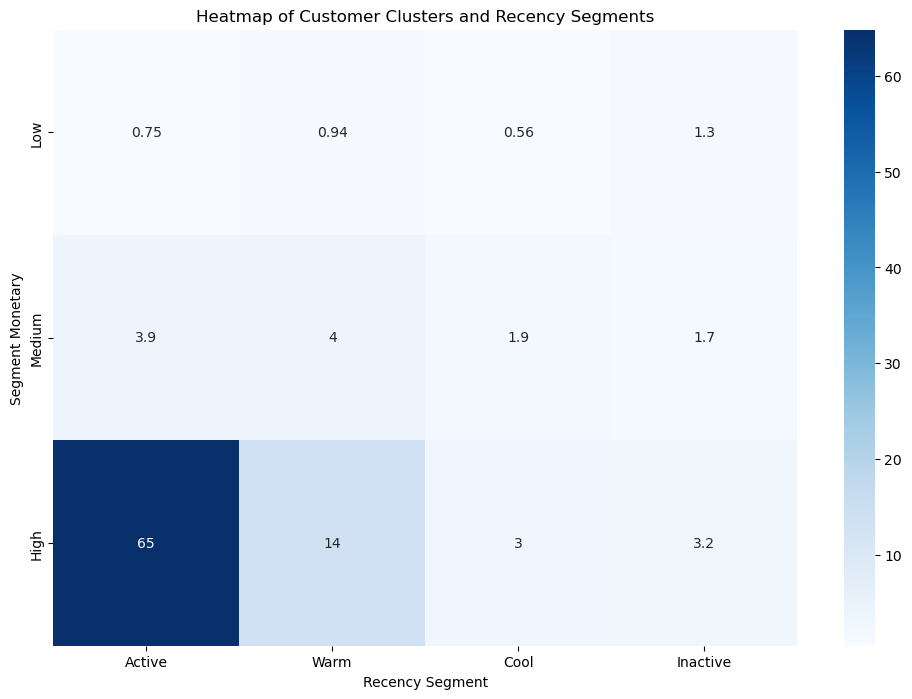

In [170]:
pivot_table = (RFM_pred.pivot_table(index='SegmentMonetary', columns='SegmentRecency', values='Monetary',aggfunc='sum', fill_value=0)/RFM.Monetary.sum())*100
pivot_table = pivot_table[['Active', 'Warm', 'Cool', 'Inactive']]
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="Blues")
plt.title('Heatmap of Customer Clusters and Recency Segments')
plt.xlabel('Recency Segment')
plt.ylabel('Segment Monetary')
plt.show()

In [171]:
RFM_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4339 entries, 12346 to 18287
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Recency          4339 non-null   int64   
 1   Frequency        4339 non-null   int64   
 2   Monetary         4339 non-null   float64 
 3   cluster          4339 non-null   object  
 4   SegmentRecency   4339 non-null   object  
 5   SegmentMonetary  4339 non-null   category
dtypes: category(1), float64(1), int64(2), object(2)
memory usage: 336.8+ KB


<AxesSubplot:xlabel='Frequency', ylabel='Count'>

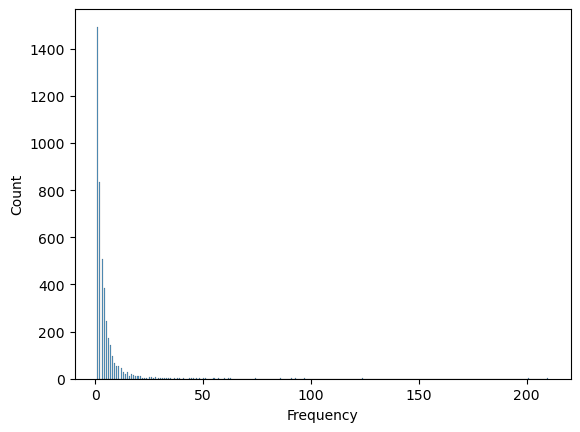

In [82]:
sns.histplot(data=RFM_pred.Frequency)

<AxesSubplot:>

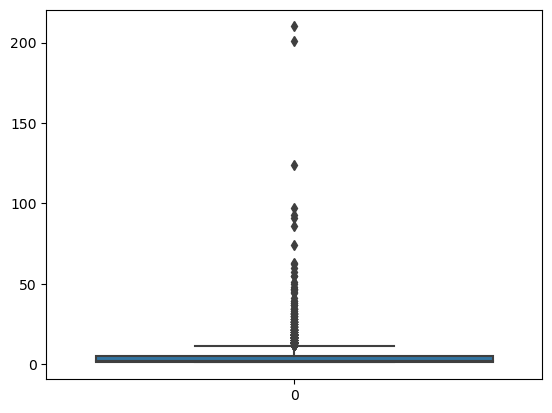

In [83]:
sns.boxplot(data=RFM_pred.Frequency)

In [172]:
pd.qcut(RFM_pred['Frequency'],4,duplicates='drop').unique()

[(0.999, 2.0], (5.0, 210.0], (2.0, 5.0]]
Categories (3, interval[float64, right]): [(0.999, 2.0] < (2.0, 5.0] < (5.0, 210.0]]

In [173]:
pd.qcut(np.log(RFM_pred['Frequency']),4,duplicates='drop')

CustomerID
12346    (-0.001, 0.693]
12347     (1.609, 5.347]
12348     (0.693, 1.609]
12349    (-0.001, 0.693]
12350    (-0.001, 0.693]
              ...       
18280    (-0.001, 0.693]
18281    (-0.001, 0.693]
18282    (-0.001, 0.693]
18283     (1.609, 5.347]
18287     (0.693, 1.609]
Name: Frequency, Length: 4339, dtype: category
Categories (3, interval[float64, right]): [(-0.001, 0.693] < (0.693, 1.609] < (1.609, 5.347]]

In [175]:
RFM_pred['SegmentFrequency'] = pd.qcut(RFM_pred['Frequency'],4,duplicates='drop', labels=['Low', 'Medium', 'High'])

In [176]:
RFM_pred

,Recency,Frequency,Monetary,cluster,SegmentRecency,SegmentMonetary,SegmentFrequency
CustomerID,,,,,,,
12346,326,1,77183.60,Gold,Inactive,High,Low
12347,2,7,4310.00,Silver,Active,High,High
12348,75,4,1797.24,Silver,Warm,High,Medium
12349,19,1,1757.55,Silver,Active,High,Low
12350,310,1,334.40,Bronze,Inactive,Low,Low
...,...,...,...,...,...,...,...
18280,278,1,180.60,Bronze,Inactive,Low,Low
18281,181,1,80.82,Bronze,Inactive,Low,Low
18282,8,2,178.05,Silver,Active,Low,Low


In [177]:
for i in RFM_pred.SegmentFrequency.unique():
    print(RFM_pred[RFM_pred['SegmentFrequency']==i])

            Recency  Frequency  Monetary cluster SegmentRecency  \
CustomerID                                                        
12346           326          1  77183.60    Gold       Inactive   
12349            19          1   1757.55  Silver         Active   
12350           310          1    334.40  Bronze       Inactive   
12353           204          1     89.00  Bronze       Inactive   
12354           232          1   1079.40  Bronze       Inactive   
...             ...        ...       ...     ...            ...   
18277            58          1    110.38  Silver           Warm   
18278            74          1    173.90  Silver           Warm   
18280           278          1    180.60  Bronze       Inactive   
18281           181          1     80.82  Bronze       Inactive   
18282             8          2    178.05  Silver         Active   

           SegmentMonetary SegmentFrequency  
CustomerID                                   
12346                 High          

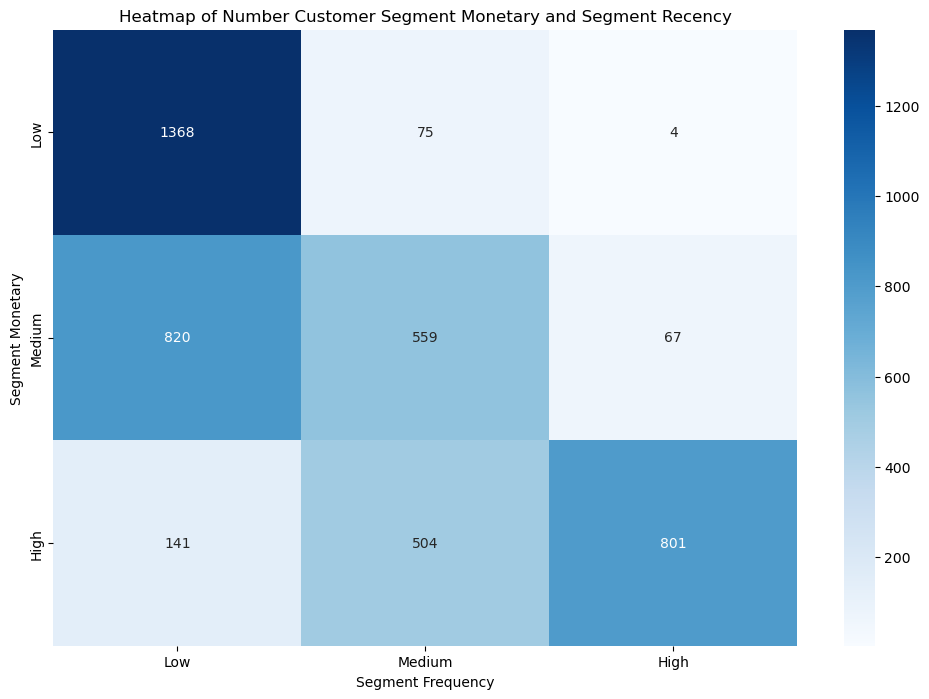

In [87]:
pivot_table = RFM_pred.pivot_table(index='SegmentMonetary', columns='SegmentFrequency',aggfunc='size', fill_value=0)
pivot_table = pivot_table[['Low', 'Medium', 'High']]
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True,fmt='d', cmap="Blues")
plt.title('Heatmap of Number Customer Segment Monetary and Segment Recency')
plt.xlabel('Segment Frequency')
plt.ylabel('Segment Monetary')
plt.show()

In [ ]:
pivot_table

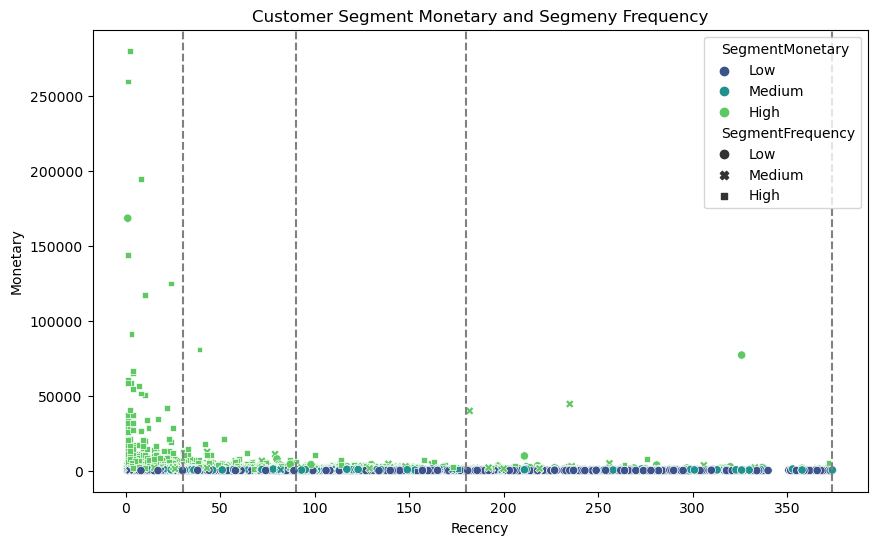

In [88]:

# Visualisasi hasil clustering dan segmentasi RFM
plt.figure(figsize=(10, 6))
sns.scatterplot(data=RFM_pred, x='Recency', y='Monetary', hue='SegmentMonetary', style='SegmentFrequency', palette='viridis')

# Menambahkan garis untuk membedakan setiap segment recency
plt.axvline(x=30, color='grey', linestyle='--')
plt.axvline(x=90, color='grey', linestyle='--')
plt.axvline(x=180, color='grey', linestyle='--')
plt.axvline(x=RFM_pred['Recency'].max(), color='grey', linestyle='--')

plt.title('Customer Segment Monetary and Segmeny Frequency')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

In [ ]:
RFM_pred.Monetary.sum()

In [ ]:
import seaborn as sns

In [ ]:
RFM_pred.columns

In [ ]:
sns.pairplot(RFM_pred, hue='cluster', palette='pastel',diag_kind='kde')
plt.show()

In [178]:
RFM_pred

,Recency,Frequency,Monetary,cluster,SegmentRecency,SegmentMonetary,SegmentFrequency
CustomerID,,,,,,,
12346,326,1,77183.60,Gold,Inactive,High,Low
12347,2,7,4310.00,Silver,Active,High,High
12348,75,4,1797.24,Silver,Warm,High,Medium
12349,19,1,1757.55,Silver,Active,High,Low
12350,310,1,334.40,Bronze,Inactive,Low,Low
...,...,...,...,...,...,...,...
18280,278,1,180.60,Bronze,Inactive,Low,Low
18281,181,1,80.82,Bronze,Inactive,Low,Low
18282,8,2,178.05,Silver,Active,Low,Low


In [ ]:
RFM_pred.reset_index()

In [ ]:
RFM_pred.reset_index().to_csv('data_RFM.csv', index=False)

In [94]:
RFM_pred.groupby(['SegmentRecency'])['Monetary'].sum().reset_index()

,SegmentRecency,Monetary
0,Active,6171179.790
1,Cool,491013.530
2,Inactive,557749.891
3,Warm,1667265.683


# Try Create Cluster by Segment menggunakan Kmode

In [ ]:
# import pandas as pd
# from kmodes.kmodes import KModes
# from sklearn.metrics import silhouette_score
# import matplotlib.pyplot as plt

## evaluasi n cluster with elbow

In [ ]:
# # Feature Selection
# X = RFM_pred[['SegmentRecency', 'SegmentMonetary', 'SegmentFrequency']]

# # Elbow Method
# cost = []
# K = range(1, 25)
# for num_clusters in K:
#     kmode = KModes(n_clusters=num_clusters, init="Cao", n_init=1, verbose=1)
#     clusters = kmode.fit_predict(X)
#     cost.append(kmode.cost_)

# plt.figure(figsize=(12, 6))
# plt.plot(K, cost, marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Cost')
# plt.title('Elbow Method For Optimal k')
# plt.grid(True)
# plt.show()

In [ ]:
# score

In [ ]:
# model =  KModes(n_clusters=5, init="Cao", n_init=1, verbose=1, random_state=42)
# member = model.fit_predict(X)

In [ ]:
# member

In [ ]:
# RFM_pred['SegmentCluster'] = member

In [ ]:
# RFM_pred

In [179]:
df_cluster = pd.merge(left=df,right=RFM_pred,how='left', on='CustomerID')

In [180]:
pd.options.display.max_columns=100

In [181]:
df_cluster.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Profit,Continent,Hour,Day,Dayname,Month,NameMonth,Quarter,Year,Recency,Frequency,Monetary,cluster,SegmentRecency,SegmentMonetary,SegmentFrequency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Europe,8,1,Wednesday,12,December,Q4,2010,372,34,5391.21,Gold,Inactive,High,High
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Europe,8,1,Wednesday,12,December,Q4,2010,372,34,5391.21,Gold,Inactive,High,High
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Europe,8,1,Wednesday,12,December,Q4,2010,372,34,5391.21,Gold,Inactive,High,High
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Europe,8,1,Wednesday,12,December,Q4,2010,372,34,5391.21,Gold,Inactive,High,High
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Europe,8,1,Wednesday,12,December,Q4,2010,372,34,5391.21,Gold,Inactive,High,High


In [182]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 392731
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         392732 non-null  int64         
 1   StockCode         392732 non-null  object        
 2   Description       392732 non-null  object        
 3   Quantity          392732 non-null  int64         
 4   InvoiceDate       392732 non-null  datetime64[ns]
 5   UnitPrice         392732 non-null  float64       
 6   CustomerID        392732 non-null  object        
 7   Country           392732 non-null  object        
 8   Profit            392732 non-null  float64       
 9   Continent         392732 non-null  object        
 10  Hour              392732 non-null  int64         
 11  Day               392732 non-null  int64         
 12  Dayname           392732 non-null  object        
 13  Month             392732 non-null  int64         
 14  Name

## Analize Transaction Hobbit time

In [49]:
hourly_transactions = df_cluster.groupby(['InvoiceNo','cluster','Hour']).size().reset_index(name='Transactions').groupby(['cluster', 'Hour'])['Transactions'].count().unstack(fill_value=0)
daily_transactions = df_cluster.groupby(['InvoiceNo','cluster','Day']).size().reset_index(name='Transactions').groupby(['cluster', 'Day'])['Transactions'].count().unstack(fill_value=0)
name_day_transactions = df_cluster.groupby(['InvoiceNo','cluster','Dayname']).size().reset_index(name='Transactions').groupby(['cluster', 'Dayname'])['Transactions'].count().unstack(fill_value=0)
monthly_transactions = df_cluster.groupby(['InvoiceNo','cluster','NameMonth']).size().reset_index(name='Transactions').groupby(['cluster', 'NameMonth'])['Transactions'].count().unstack(fill_value=0)
quarter_transactions = df_cluster.groupby(['InvoiceNo','cluster','Quarter']).size().reset_index(name='Transactions').groupby(['cluster', 'Quarter'])['Transactions'].count().unstack(fill_value=0)

In [48]:
hourly_transactions

Hour,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
cluster,,,,,,,,,,,,,,,
Bronze,0,34,809,2029,2829,3011,5133,4874,4212,3691,1712,950,403,267,218
Gold,0,139,1519,5159,9086,9762,15131,12140,10603,9120,4918,3317,524,786,31
Platinum,0,66,762,1136,3141,4187,4696,4163,4293,2868,1115,917,153,560,49
Silver,1,140,5598,13604,22719,31413,45982,41847,34152,29114,15974,7758,1816,1621,480


In [226]:
import calendar
# Mengambil nama hari dari calendar module
day_names = list(calendar.day_name)

In [227]:
name_day_transactions = name_day_transactions.reindex(columns=day_names, fill_value=0)

In [238]:
name_day_transactions = name_day_transactions.unstack().reset_index(name='transaction')

In [239]:
name_day_transactions

,Dayname,cluster,transaction
0,Monday,Bronze,231
1,Monday,Gold,732
2,Monday,Platinum,158
3,Monday,Silver,1742
4,Tuesday,Bronze,249
5,Tuesday,Gold,785
6,Tuesday,Platinum,197
7,Tuesday,Silver,1954
8,Wednesday,Bronze,322
9,Wednesday,Gold,870


In [273]:
# Reindex to ensure all hours from 0 to 23 are included
all_hours = range(24)
hourly_transactions = hourly_transactions.reindex(columns=all_hours, fill_value=0)

In [274]:
hourly_transactions = hourly_transactions.unstack().reset_index(name='transaction')

In [275]:
hourly_transactions

,Hour,cluster,transaction
0,0,Bronze,0
1,0,Gold,0
2,0,Platinum,0
3,0,Silver,0
4,1,Bronze,0
...,...,...,...
91,22,Silver,0
92,23,Bronze,0
93,23,Gold,0
94,23,Platinum,0


In [277]:
hourly_transactions['Hour'].astype(str)

0      0
1      0
2      0
3      0
4      1
      ..
91    22
92    23
93    23
94    23
95    23
Name: Hour, Length: 96, dtype: object

In [278]:
hourly_transactions['Hour'] = hourly_transactions['Hour'].astype(str)

In [234]:
# jika dita tifdak terdapat transaksi sama sekali di tanggal tertentu bisa menggunakan ini

tanggal_bulan=list(range(1,31))
daily_transactions = daily_transactions.reindex(columns=tanggal_bulan,fill_value=0)

In [235]:

daily_transactions

Day,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bronze,80,66,63,48,69,70,78,70,56,68,60,48,56,52,62,61,56,46,46,63,51,34,58,47,35,38,40,52,24,23
Gold,194,182,123,171,174,190,159,195,177,157,140,133,138,202,115,167,179,156,108,162,147,126,129,154,139,110,135,139,89,91
Platinum,45,25,28,37,51,51,53,38,30,36,46,23,27,30,40,41,47,28,30,39,41,29,49,24,29,29,30,45,18,20
Silver,390,340,306,373,429,490,483,468,397,366,383,303,375,386,336,381,412,342,335,397,355,375,343,358,359,270,341,388,273,309


In [236]:
daily_transactions = daily_transactions.unstack().reset_index(name='transaction')

In [264]:
daily_transactions['Day'] = daily_transactions['Day'].astype(str)

In [265]:
daily_transactions

,Day,cluster,transaction
0,1,Bronze,80
1,1,Gold,194
2,1,Platinum,45
3,1,Silver,390
4,2,Bronze,66
...,...,...,...
115,29,Silver,273
116,30,Bronze,23
117,30,Gold,91
118,30,Platinum,20


In [244]:
month_names = list(calendar.month_name)[1:]

In [245]:
month_names

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [247]:
monthly_transactions[month_names]
monthly_transactions = monthly_transactions.reindex(columns=month_names, fill_value=0)

In [250]:
monthly_transactions

,NameMonth,cluster,transaction
0,January,Bronze,188
1,January,Gold,269
2,January,Platinum,55
3,January,Silver,475
4,February,Bronze,188
5,February,Gold,281
6,February,Platinum,47
7,February,Silver,482
8,March,Bronze,260
9,March,Gold,335


In [249]:
monthly_transactions = monthly_transactions.unstack().reset_index(name='transaction')

In [251]:
monthly_transactions['NameMonth'] = monthly_transactions['NameMonth'].astype(str)

In [252]:
monthly_transactions

,NameMonth,cluster,transaction
0,January,Bronze,188
1,January,Gold,269
2,January,Platinum,55
3,January,Silver,475
4,February,Bronze,188
5,February,Gold,281
6,February,Platinum,47
7,February,Silver,482
8,March,Bronze,260
9,March,Gold,335


In [194]:
quarter_transactions

Quarter,Q1,Q2,Q3,Q4
cluster,,,,
Bronze,636,646,114,260
Gold,885,1105,1043,1523
Platinum,174,232,271,398
Silver,1611,2114,2940,4584


In [201]:
hourly_transactions.columns

RangeIndex(start=0, stop=24, step=1, name='Hour')

In [211]:
hourly_transactions['Hour'] = hourly_transactions['Hour'].astype(str)

In [280]:
hourly_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Hour         96 non-null     object
 1   cluster      96 non-null     object
 2   transaction  96 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.4+ KB


In [282]:
hourly_transactions.groupby(['cluster','Hour'])['transaction'].sum().reset_index()

,cluster,Hour,transaction
0,Bronze,0,0
1,Bronze,1,0
2,Bronze,10,190
3,Bronze,11,179
4,Bronze,12,286
...,...,...,...
91,Silver,5,0
92,Silver,6,1
93,Silver,7,13
94,Silver,8,351


In [261]:
monthly_transactions.columns

Index(['NameMonth', 'cluster', 'transaction'], dtype='object')

In [279]:
fig = px.line_polar(hourly_transactions,r='transaction', theta='Hour', color='cluster', line_close=True,
                   hover_data=['transaction'])
fig.update_traces(fill='toself')
fig.show()

# fig = px.line_polar(name_day_transactions,r='transaction', theta='Dayname', color='cluster', line_close=True,
#                    hover_data=['transaction'])
# fig.update_traces(fill='toself')
# fig.show()

# fig = px.line_polar(daily_transactions,r='transaction', theta='Day', color='cluster', line_close=True,
#                    hover_data=['transaction'])
# fig.update_traces(fill='toself')
# fig.show()

# fig = px.line_polar(monthly_transactions,r='transaction', theta='NameMonth', color='cluster', line_close=True,
#                    hover_data=['transaction'])
# fig.update_traces(fill='toself')
# fig.show()


In [ ]:
df_cluster.InvoiceNo.nunique()

In [ ]:
# Heatmap untuk transaksi per jam
plt.figure(figsize=(12, 6))
sns.heatmap(hourly_transactions, annot=True, cmap='Blues', fmt='d')
plt.title('Hourly Transactions per Cluster')
plt.xlabel('Hour of the Day')
plt.ylabel('Cluster')
plt.show()

# Heatmap untuk transaksi per jam
plt.figure(figsize=(12, 6))
sns.heatmap(name_day_transactions, annot=True, cmap='Blues', fmt='d')
plt.title('name day Transactions per Cluster')
plt.xlabel('Day')
plt.ylabel('Cluster')
plt.show()


# Heatmap untuk transaksi per tanggal
plt.figure(figsize=(12, 6))
sns.heatmap(daily_transactions, annot=True, cmap='Blues', fmt='d', annot_kws={'rotation': 90, 'verticalalignment': 'center'})
plt.title('Daily Transactions per Cluster')
plt.xlabel('Day of the Month')
plt.ylabel('Cluster')
plt.show()

# Heatmap untuk transaksi per bulan
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_transactions[bulan_urut], annot=True, cmap='Blues', fmt='d')
plt.title('Monthly Transactions per Cluster')
plt.xlabel('Month')
plt.ylabel('Cluster')
plt.show()

In [ ]:
RFM_pred.groupby(["cluster"])[["Recency","Frequency","Monetary"]].mean()

In [ ]:
RFM_pred.describe()

1. Analisis Data Transaksi Jam
    - Klaster silver:

        - Puncak Aktivitas: Jam 12:00-14:00.
        - Strategi: Luncurkan promosi spesial pada jam-jam ini untuk memanfaatkan puncak transaksi.
    - Klaster gold:

        - Aktivitas: Stabil sepanjang hari, dengan sedikit peningkatan antara jam 9:00-14:00.
        - Strategi: Fokuskan upaya pemasaran pada jam-jam ini untuk meningkatkan visibilitas.
    - Klaster platinum:

        - Aktivitas: Sangat rendah sepanjang hari, sedikit puncak pada jam 12:00-13:00.
        - Strategi: Tingkatkan kampanye pemasaran untuk meningkatkan partisipasi sepanjang hari.
    - Klaster bronze:

        - Aktivitas: Stabil dengan sedikit peningkatan antara jam 10:00-13:00.
        - Strategi: Pertahankan upaya pemasaran yang konsisten, khususnya selama jam-jam aktif.
2. Analisis Data Transaksi Dayweek:
    - Klaster silver:

        - Puncak Aktivitas: banyak transaksi hari kamis.
        - Strategi: Luncurkan promosi spesial pada jam-jam ini untuk memanfaatkan puncak transaksi.
    - Klaster gold:

        - Aktivitas: banyak transaksi hari kamis.
        - Strategi: Fokuskan upaya pemasaran pada hari hari ini untuk meningkatkan visibilitas.
    - Klaster platinum:

        - Aktivitas: banyak transaksi di hari kamis.
        - Strategi: Tingkatkan kampanye pemasaran untuk meningkatkan partisipasi sepanjang hari.
    - Klaster bronze:

        - Aktivitas: banyak transaksi hari kamis.
        - Strategi: Pertahankan upaya pemasaran yang konsisten, khususnya selama jam-jam aktif.

3. Analisis Data Transaksi per tanggal
    - Klaster silver:

        - Puncak Aktivitas: Konsisten tinggi dengan beberapa puncak pada tanggal 5, 8, 15, dan 20.
        - Strategi: Luncurkan promosi spesial dan kampanye penjualan pada tanggal-tanggal ini untuk memanfaatkan puncak transaksi.
    - Klaster gold:

        - Aktivitas: Stabil dengan beberapa puncak pada tanggal 1, 14, dan 22.
        - Strategi: Fokuskan upaya pemasaran dan penawaran spesial pada tanggal-tanggal ini untuk meningkatkan transaksi.
    - Klaster platinum:

        - Aktivitas: Sangat rendah, dengan sedikit peningkatan pada tanggal 5 dan 20.
        - Strategi: Tingkatkan kampanye pemasaran pada tanggal-tanggal ini untuk meningkatkan partisipasi dan transaksi.
    - Klaster bronze:

        - Aktivitas: Rendah dengan beberapa puncak pada tanggal 1 dan 31.
        - Strategi: Pertahankan upaya pemasaran yang konsisten, khususnya pada tanggal-tanggal ini untuk memaksimalkan transaksi.

4. Analisis Data Transaksi Bulanan
    - Klaster silver:

        - Puncak Aktivitas: Oktober dan November.
        - Strategi: Rencanakan promosi besar dan kampanye produk pada bulan-bulan ini.
    - Klaster Gold:

        - Aktivitas: Stabil sepanjang tahun, puncak di Desember.
        - Strategi: Pertahankan strategi yang konsisten dan tingkatkan promosi di bulan dengan transaksi rendah.
    - Klaster Platinumn:

        - Aktivitas: Rendah sepanjang tahun, puncak di September.
        - Strategi: Fokuskan pemasaran dan inovasi produk untuk meningkatkan transaksi sepanjang tahun.
    - Klaster Bronze:

        - Aktivitas: Variatif, puncak di Januari dan Desember.
        - Strategi: Tingkatkan keterlibatan dan promosikan produk secara agresif selama bulan dengan aktivitas tinggi.

3. Analisis Data Transaksi per tanggal
    - Klaster silver:

        - Puncak Aktivitas: Konsisten tinggi dengan beberapa puncak pada tanggal 5, 8, 15, dan 20.
        - Strategi: Luncurkan promosi spesial dan kampanye penjualan pada tanggal-tanggal ini untuk memanfaatkan puncak transaksi.
    - Klaster gold:

        - Aktivitas: Stabil dengan beberapa puncak pada tanggal 1, 14, dan 22.
        - Strategi: Fokuskan upaya pemasaran dan penawaran spesial pada tanggal-tanggal ini untuk meningkatkan transaksi.
    - Klaster platinum:

        - Aktivitas: Sangat rendah, dengan sedikit peningkatan pada tanggal 5 dan 20.
        - Strategi: Tingkatkan kampanye pemasaran pada tanggal-tanggal ini untuk meningkatkan partisipasi dan transaksi.
    - Klaster bronze:

        - Aktivitas: Rendah dengan beberapa puncak pada tanggal 1 dan 31.
        - Strategi: Pertahankan upaya pemasaran yang konsisten, khususnya pada tanggal-tanggal ini untuk memaksimalkan transaksi.
        




# Kesimpulan Karakteristik setiap cluster

1. Klaster silver: Pelanggan Baru atau Kurang Aktif
    - Karakteristik:

        - Recency: 44 hari yang lalu.
        - Frequency: 3-4 kali.
        - Monetary: Rp 1.345,42.
    - Analisis Transaksi:

        - Bulanan: Puncak aktivitas di Oktober dan November.
        - Tanggal: Puncak aktivitas pada tanggal 5, 8, 15, dan 20.
        - Jam: Puncak aktivitas antara jam 12:00-14:00.
    - Strategi:

        - Promosi dan Diskon Awal:
            - Berikan diskon atau promosi khusus untuk mendorong transaksi lebih lanjut.
            - Contoh: "Diskon 20% untuk pembelian berikutnya" atau "Beli 2, gratis 1".
            - Waktu: Luncurkan promosi pada jam 12:00-14:00 di tanggal 5, 8, 15, dan 20 pada bulan Oktober dan November.
        - Email Marketing dan Rekomendasi Produk:
            - Kirim email dengan rekomendasi produk berdasarkan pembelian sebelumnya atau produk populer.
            - Contoh: "Anda mungkin menyukai produk ini..." atau "Produk terlaris minggu ini".
        - Program Loyalitas:
            - Perkenalkan program loyalitas yang memberikan poin atau hadiah untuk setiap pembelian.
            - Contoh: "Dapatkan poin setiap pembelian yang bisa ditukar dengan diskon atau hadiah".
2. Klaster gold: Pelanggan Setia dengan Pembelanjaan Tinggi
    - Karakteristik:

        - Recency: 16 hari yang lalu.
        - Frequency: 22 kali.
        - Monetary: Rp 12.463,81.
    - Analisis Transaksi:

        - Bulanan: Stabil sepanjang tahun, puncak di Desember.
        - Tanggal: Puncak aktivitas pada tanggal 1, 14, dan 22.
        - Jam: Aktivitas stabil dengan sedikit peningkatan antara jam 9:00-14:00.
    - Strategi:

        - Program Penghargaan dan Loyalitas:
            - Tingkatkan program loyalitas dengan memberikan penghargaan eksklusif atau keuntungan tambahan.
            - Contoh: "Akses eksklusif ke penjualan awal" atau "Bonus poin ganda di bulan ulang tahun".
            - Waktu: Fokuskan upaya pemasaran pada jam 9:00-14:00 di tanggal 1, 14, dan 22 sepanjang tahun, terutama di bulan Desember.
        - Penawaran Produk Premium:
            - Tawarkan produk premium atau bundling dengan harga spesial.
            - Contoh: "Bundle eksklusif dengan diskon 10%" atau "Produk premium terbaru".
        - Umpan Balik dan Personalisasi:
            - Minta umpan balik untuk meningkatkan layanan dan sesuaikan penawaran berdasarkan preferensi individu.
            - Contoh: "Kami ingin mendengar pendapat Anda..." atau "Rekomendasi produk khusus untuk Anda".
3. Klaster platinum: Pelanggan Paling Berharga (VIP)
    - Karakteristik:

        - Recency: 7 hari yang lalu.
        - Frequency: 83 kali.
        - Monetary: Rp 127.187,96.
    - Analisis Transaksi:

        - Bulanan: Puncak aktivitas di September.
        - Tanggal: Puncak aktivitas pada tanggal 5 dan 20.
        - Jam: Aktivitas sangat rendah sepanjang hari, sedikit puncak pada jam 12:00-13:00.
    - Strategi:

        - Layanan dan Pengalaman Eksklusif:
            - Berikan layanan khusus seperti personal shopper atau akses VIP ke acara eksklusif.
            - Contoh: "Akses VIP ke peluncuran produk" atau "Layanan personal shopper gratis".
            - Waktu: Berikan layanan eksklusif pada jam 12:00-13:00 di tanggal 5 dan 20 sepanjang tahun, terutama di bulan September.
        - Penawaran Produk Terbatas:
            - Tawarkan produk edisi terbatas atau koleksi khusus yang tidak tersedia untuk pelanggan lain.
            - Contoh: "Edisi terbatas hanya untuk anggota VIP" atau "Koleksi eksklusif terbaru".
        - Program VIP:
            - Kembangkan program VIP dengan keuntungan lebih seperti pengiriman gratis, hadiah ulang tahun, atau diskon khusus.
            - Contoh: "Pengiriman gratis untuk semua pesanan" atau "Hadiah ulang tahun eksklusif".
4. Klaster bronze: Pelanggan Tidak Aktif atau Berisiko Churn
    - Karakteristik:

        - Recency: 248 hari yang lalu.
        - Frequency: 1-2 kali.
        - Monetary: Rp 478,65.
    - Analisis Transaksi:

        - Bulanan: Puncak aktivitas di Januari dan Desember.
        - Tanggal: Puncak aktivitas pada tanggal 1 dan 31.
        - Jam: Aktivitas stabil dengan sedikit peningkatan antara jam 10:00-13:00.
    - Strategi:

        - Kampanye Reaktivasi:
            - Kirim kampanye reaktivasi dengan penawaran khusus untuk menarik mereka kembali.
            - Contoh: "Diskon 30% untuk kembali berbelanja" atau "Hadiah gratis dengan pembelian pertama Anda setelah lama tidak aktif".
            - Waktu: Luncurkan kampanye reaktivasi pada jam 10:00-13:00 di tanggal 1 dan 31 sepanjang tahun, terutama di bulan Januari dan Desember.
        - Survey Kepuasan Pelanggan:
            - Lakukan survey untuk memahami alasan ketidakaktifan dan tawarkan solusi atau penawaran yang relevan.
            - Contoh: "Apa yang bisa kami perbaiki?" atau "Diskon 20% sebagai ucapan terima kasih atas umpan balik Anda".
        - Follow-Up Personal:
            - Lakukan follow-up personal melalui email atau telepon untuk mengetahui kebutuhan mereka dan menawarkan bantuan.
            - Contoh: "Kami merindukan Anda! Ada yang bisa kami bantu?" atau "Diskon khusus untuk menyambut Anda kembali".

In [ ]:
df_cluster

In [ ]:
df_cluster.InvoiceDate.min()

In [ ]:
df_cluster.InvoiceDate.max()

## Try Cohort analize

### Analisis Cohort berdasarkan jumlah transaksi

In [ ]:
df_cohort_num_transaction = df_cluster.copy()

In [ ]:
df_cohort_num_transaction['InvoiceMonth'] = df_cohort_num_transaction['InvoiceDate'].dt.to_period('M')

In [ ]:
df_cohort_num_transaction

In [ ]:
df_cohort_num_transaction['CohortMonth'] = df_cohort_num_transaction.groupby('CustomerID')['InvoiceMonth'].transform('min')

In [ ]:
df_cohort_num_transaction

In [ ]:
df_cohort_num_transaction.groupby(['CohortMonth', 'InvoiceMonth'])['InvoiceNo'].nunique().reset_index()

In [ ]:
cohort_data_num_transaction = df_cohort_num_transaction.groupby(['CohortMonth', 'InvoiceMonth'])['InvoiceNo'].nunique().reset_index()

In [ ]:
# Menghitung jarak waktu dari pembelian pertama
cohort_data_num_transaction['CohortIndex'] = (cohort_data_num_transaction['InvoiceMonth'].dt.year - cohort_data_num_transaction['CohortMonth'].dt.year) * 12 + (cohort_data_num_transaction['InvoiceMonth'].dt.month - cohort_data_num_transaction['CohortMonth'].dt.month) + 1

In [ ]:
# Membuat pivot table untuk analisis kohort
cohort_pivot_num_transaction = cohort_data_num_transaction.pivot_table(index='CohortMonth', columns='CohortIndex', values='InvoiceNo')

In [ ]:
cohort_pivot_num_transaction

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Cohort Analysis - Number of Transactions')

# Membuat heatmap menggunakan seaborn
sns.heatmap(cohort_pivot_num_transaction, annot=True, fmt=".0f", cmap="Blues")

# Menampilkan plot
plt.show()

### Analize Cohort berdasarkan Profit

In [ ]:
df_cohort_profit = df_cluster.copy()

In [ ]:
df_cohort_profit

In [ ]:
# Mengelompokkan data berdasarkan bulan pembelian pertama
df_cohort_profit['InvoiceMonth'] = df_cohort_profit['InvoiceDate'].dt.to_period('M')
df_cohort_profit['FirstPurchaseMonth'] = df_cohort_profit.groupby('CustomerID')['InvoiceMonth'].transform('min')



In [ ]:
# Menghitung nilai total penjualan per kohort per bulan
cohort_data_profit = df_cohort_profit.groupby(['FirstPurchaseMonth', 'InvoiceMonth']).agg({
    'Profit': 'sum'
}).reset_index()



In [ ]:
cohort_data_profit

In [ ]:
(cohort_data_profit['InvoiceMonth'].dt.year - cohort_data_profit['FirstPurchaseMonth'].dt.year)

In [ ]:
(cohort_data_profit['InvoiceMonth'].dt.month - cohort_data_profit['FirstPurchaseMonth'].dt.month)

In [ ]:
# Menghitung jarak waktu dari pembelian pertama
cohort_data_profit['CohortIndex'] = (cohort_data_profit['InvoiceMonth'].dt.year - cohort_data_profit['FirstPurchaseMonth'].dt.year) * 12 + (cohort_data_profit['InvoiceMonth'].dt.month - cohort_data_profit['FirstPurchaseMonth'].dt.month) + 1



In [ ]:
cohort_data_profit

In [ ]:
### Membuat pivot table untuk analisis kohort
cohort_pivot_profit = cohort_data_profit.pivot_table(index='FirstPurchaseMonth', columns='CohortIndex', values='Profit')

In [ ]:
cohort_pivot_profit.sum().sum()

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Cohort Analysis - Profit')

# Membuat heatmap menggunakan seaborn
sns.heatmap(cohort_pivot_profit, annot=True, fmt=".0f", cmap="Blues")

# Menampilkan plot
plt.show()

### Analisis Kohort Berdasarkan Jumlah Pelanggan Aktif:

In [ ]:
df_cohort_customer = df_cluster.copy()

In [ ]:
# Mengelompokkan data berdasarkan bulan pembelian pertama
df_cohort_customer['InvoiceMonth'] = df_cohort_customer['InvoiceDate'].dt.to_period('M')
df_cohort_customer['CohortMonth'] = df_cohort_customer.groupby('CustomerID')['InvoiceMonth'].transform('min')

# Menghitung jumlah pelanggan unik per kohort per bulan
cohort_data_customer = df_cohort_customer.groupby(['CohortMonth', 'InvoiceMonth'])['CustomerID'].nunique().reset_index()

# Menghitung jarak waktu dari pembelian pertama
cohort_data_customer['CohortIndex'] = (cohort_data_customer['InvoiceMonth'].dt.year - cohort_data_customer['CohortMonth'].dt.year) * 12 + (cohort_data_customer['InvoiceMonth'].dt.month - cohort_data_customer['CohortMonth'].dt.month) + 1

# Membuat pivot table untuk analisis kohort
cohort_pivot_customer = cohort_data_customer.pivot_table(index='CohortMonth', columns='CohortIndex', values='CustomerID')

In [ ]:
cohort_pivot_customer

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Cohort Analysis - number active customer')

# Membuat heatmap menggunakan seaborn
sns.heatmap(cohort_pivot_customer, annot=True, fmt=".0f", cmap="Blues")

# Menampilkan plot
plt.show()

# Try Anlize ABC for produk

In [ ]:
df_cluster

In [ ]:
product_sales = df_cluster.groupby('StockCode')['Quantity'].sum().reset_index()
product_sales

In [ ]:
# Menghitung persentase kontribusi setiap produk
product_sales['ContributionPct'] = (product_sales['Quantity'] / product_sales['Quantity'].sum()) * 100
product_sales

In [ ]:
# Mengurutkan produk berdasarkan kontribusi
product_sales = product_sales.sort_values(by='ContributionPct', ascending=False)
product_sales

In [ ]:
# Mengelompokkan produk ke dalam kategori A, B, dan C
def categorize(row, cumulative):
    if cumulative + row['ContributionPct'] <= 80:
        return 'A'
    elif cumulative + row['ContributionPct'] <= 95:
        return 'B'
    else:
        return 'C'


In [ ]:
# Mengelompokkan produk ke dalam kategori A, B, dan C
cumulative = 0
categories = []

for index, row in product_sales.iterrows():
    if cumulative + row['ContributionPct'] <= 80:
        categories.append('A')
    elif cumulative + row['ContributionPct'] <= 95:
        categories.append('B')
    else:
        categories.append('C')
    cumulative += row['ContributionPct']

product_sales['Category'] = categories

In [ ]:
product_sales.Category.value_counts()

In [ ]:
product_sales

Strategi dan ###Rekomendasi Berdasarkan Analisis ABC
- Kategori A:

        - Fokuskan Upaya Pemasaran dan Promosi: Produk dalam kategori A adalah produk terpenting dan harus menjadi fokus utama dalam strategi pemasaran dan promosi.
        - Manajemen Persediaan yang Ketat: Pastikan selalu tersedia stok untuk produk ini karena mereka memberikan kontribusi terbesar terhadap penjualan.
- Kategori B:

        - Optimalisasi Promosi: Evaluasi strategi promosi yang dapat meningkatkan penjualan produk dalam kategori ini, seperti diskon atau bundling dengan produk kategori A.
        - Monitoring Teratur: Lakukan pemantauan rutin untuk produk ini untuk memastikan mereka tetap berkinerja baik dan tidak bergeser ke kategori C.
- Kategori C:

        - Evaluasi Keberlanjutan Produk: Pertimbangkan untuk mengurangi atau bahkan menghentikan produk-produk dalam kategori ini jika tidak memberikan kontribusi signifikan terhadap penjualan.
        - Strategi Pengurangan Stok: Lakukan penjualan clearance atau diskon besar untuk mengurangi persediaan produk kategori C yang lambat bergerak.

# Try Analysis ABC 
(mengelompokkan pelanggan berdasarkan jumlah total kuantitas yang mereka beli)

In [ ]:
customer_quantity = df_cluster.groupby('CustomerID')['Quantity'].sum().reset_index()
customer_quantity

In [ ]:
customer_quantity['ContributionPct'] = (customer_quantity['Quantity'] / customer_quantity['Quantity'].sum()) * 100
customer_quantity

In [ ]:
customer_quantity = customer_quantity.sort_values(by='ContributionPct', ascending=False)
customer_quantity

In [ ]:
# def categorize(row, cumulative):
#     if cumulative + row['ContributionPct'] <= 80:
#         return 'A'
#     elif cumulative + row['ContributionPct'] <= 95:
#         return 'B'
#     else:
#         return 'C'

# cumulative = 0
# customer_quantity['Category'] = customer_quantity.apply(lambda row: categorize(row, cumulative), axis=1)
# cumulative += row['ContributionPct']

In [ ]:
# Mengelompokkan produk ke dalam kategori A, B, dan C
cumulative = 0
categories = []

for index, row in customer_quantity.iterrows():
    if cumulative + row['ContributionPct'] <= 80:
        categories.append('A')
    elif cumulative + row['ContributionPct'] <= 95:
        categories.append('B')
    else:
        categories.append('C')
    cumulative += row['ContributionPct']

customer_quantity['Category'] = categories

In [ ]:
customer_quantity

In [ ]:
customer_quantity[customer_quantity.Category=='A']

# Try Anlize Customer Lifetime Value (CLV) Analysis

In [ ]:
df_cluster

In [ ]:
df_clv = df_cluster.groupby('CustomerID')['TotalPrice'].sum().reset_index()
df_clv

In [ ]:
# Menghitung nilai rata-rata per transaksi per pelanggan
df_clv['AvgOrderValue'] = df_cluster.groupby('CustomerID')['TotalPrice'].mean().values
df_clv

In [ ]:
# Menghitung frekuensi transaksi per pelanggan
df_clv['PurchaseFrequency'] = df_cluster.groupby('CustomerID')['InvoiceNo'].nunique().values
df_clv

In [ ]:
purchase_frequency = df_clv['PurchaseFrequency'].sum() / df_clv.shape[0]
purchase_frequency

In [ ]:
repeat_rate = df_clv[df_clv['PurchaseFrequency'] > 1].shape[0] / df_clv.shape[0]
repeat_rate

In [ ]:
churn_rate = 1 - repeat_rate
churn_rate

In [ ]:
df_clv['CLV'] = (df_clv['AvgOrderValue'] * purchase_frequency) / churn_rate
df_clv

In [ ]:
plt.hist(df_clv['CLV'], bins=100)
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Number of Customers')
plt.title('Distribution of CLV')
plt.show()

In [ ]:
df_clv['CLV_Segment'] = pd.qcut(df_clv['CLV'], q=3, labels=['Low', 'Medium', 'High'])


plt.figure(figsize=(10, 6))
sns.boxplot(x='CLV_Segment', y='CLV', data=df_clv)
plt.xlabel('CLV Segment')
plt.ylabel('Customer Lifetime Value')
plt.title('CLV by Segment')
plt.show()

In [ ]:
pd.options.display.max_rows=10000

In [ ]:
df_clv

In [ ]:
df_cluster.to_csv('df_cluster.csv', index=False)

In [ ]:
df_cluster.head(3)

In [ ]:
df_cluster.groupby(['InvoiceNo'])['Profit'].sum().reset_index()['Profit'].mean()

In [ ]:
df_cluster.InvoiceNo.nunique()

In [ ]:
total_sales_per_month.info()

In [ ]:
total_sales_per_month['Month'].dt.strftime('%Y-%m')

## Recomendation Content Base

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize


## Create bank stock

In [ ]:
df_bank_stock=df_cluster.loc[:, ['StockCode','Description']]

In [ ]:
df_bank_stock.duplicated().sum()

In [ ]:
df_bank_stock.drop_duplicates(subset='StockCode',keep='first',inplace=True)

In [ ]:
df_bank_stock

### encode Bank stock

In [ ]:
bow = CountVectorizer(stop_words="english", tokenizer=word_tokenize)
bank = bow.fit_transform(df_bank_stock.Description)

In [ ]:
df_bank_stock.loc[df_bank_stock['StockCode'] == '85123A', 'Description'].values[0]

# Step 1: Encode what customer buy

In [ ]:
description = df_bank_stock.loc[df_bank_stock['StockCode'] == '85123A', 'Description'].values[0]
description

In [ ]:
code = bow.transform([description])

In [ ]:
code.toarray()

## Step 2 Description Search

In [ ]:
from sklearn.metrics.pairwise import cosine_distances

In [ ]:
dist = cosine_distances(code, bank)
dist

In [ ]:
rec_stockcode = dist.argsort()[0, 1:11]
rec_stockcode

## Step 3: Recommend

In [ ]:
df_bank_stock.loc[rec_stockcode]

# ML Engineering

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize

from sklearn.metrics.pairwise import cosine_distances

class RecommenderSystem():
    def __init__(self, series1,series2, description_col):
        self.df = df_bank_stock.loc[:, [series1,series2]]
        self.description_col = description_col
        self.series1 = series1
        self.series2 = series2
        self.encoder = None
        self.bank = None
        
    def fit(self):
        self.encoder = CountVectorizer(stop_words="english", tokenizer=word_tokenize)
        self.bank = self.encoder.fit_transform(self.df[self.description_col])
        
    def recommend(self,stockcode, topk = 10):
        # Memastikan stockcode ada di DataFrame
        if stockcode not in self.df[self.series1].values:
            raise ValueError("Stockcode tidak ditemukan dalam dataset")
        
        # Mengambil deskripsi berdasarkan stockcode
        description = self.df[self.df[self.series1] == stockcode][self.series2].values[0]
        code = self.encoder.transform([description])
        
        # Menghitung jarak cosine dan mencari item yang paling mirip
        dist = cosine_distances(code, self.bank)
        rec_indices = dist.argsort()[0, 1:(topk+1)]
        return self.df.iloc[rec_indices]

In [ ]:
recsys = RecommenderSystem(series1='StockCode',series2='Description', description_col='Description')

In [ ]:
recsys

In [ ]:
recsys.fit()

In [ ]:
recsys.recommend('23032')

In [ ]:
df_bank_stock.sample()

In [4]:
df_cluster = pd.read_csv("df_cluster.csv")

## dari chat gpt

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_distances

class RecommenderSystem:
    def __init__(self, df, series1, series2):
        self.df_bank_stock = df.loc[:, [series1, series2]]
        self.df_bank_stock.drop_duplicates(subset='StockCode', keep='first', inplace=True)
        self.df = self.df_bank_stock.loc[:, [series1, series2]]
        self.series1 = series1
        self.series2 = series2
        self.encoder = None
        self.bank = None
        
    def fit(self):
        self.encoder = CountVectorizer(stop_words="english", tokenizer=word_tokenize)
        self.bank = self.encoder.fit_transform(self.df[self.series2])
        
    def recommend(self, stockcode, topk=10):
        # Memastikan stockcode ada di DataFrame
        if stockcode not in self.df[self.series1].values:
            raise ValueError("Stockcode tidak ditemukan dalam dataset")
        
        # Mengambil deskripsi berdasarkan stockcode
        description = self.df[self.df[self.series1] == stockcode][self.series2].values[0]
        code = self.encoder.transform([description])
        
        # Menghitung jarak cosine dan mencari item yang paling mirip
        dist = cosine_distances(code, self.bank)
        rec_indices = dist.argsort()[0, 1:(topk+1)]
        return self.df.iloc[rec_indices]

In [20]:
recomen_produk = RecommenderSystem(df_cluster,'StockCode', 'Description')

In [21]:
recomen_produk.fit()

In [40]:
rec_prod = recomen_produk.recommend('71053')
rec_prod

,StockCode,Description
160,22224,WHITE LOVEBIRD LANTERN
176005,90046,WHITE WITH METAL BAG CHARM
443,22465,HANGING METAL STAR LANTERN
155,22464,HANGING METAL HEART LANTERN
15440,22826,LOVE SEAT ANTIQUE WHITE METAL
363341,90130A,WHITE STONE/CRYSTAL EARRINGS
7362,21910,WAY OUT METAL SIGN
10274,21171,BATHROOM METAL SIGN
19045,79403,FROSTED WHITE BASE
165709,23323,WHITE WICKER STAR


In [39]:
rec_prod.reset_index(inplace=True)
rec_prod

,level_0,index,StockCode,Description
0,0,160,22224,WHITE LOVEBIRD LANTERN
1,1,176005,90046,WHITE WITH METAL BAG CHARM
2,2,443,22465,HANGING METAL STAR LANTERN
3,3,155,22464,HANGING METAL HEART LANTERN
4,4,15440,22826,LOVE SEAT ANTIQUE WHITE METAL
5,5,363341,90130A,WHITE STONE/CRYSTAL EARRINGS
6,6,7362,21910,WAY OUT METAL SIGN
7,7,10274,21171,BATHROOM METAL SIGN
8,8,19045,79403,FROSTED WHITE BASE
9,9,165709,23323,WHITE WICKER STAR


In [9]:
df_cluster.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Profit,Continent,...,NameMonth,Quarter,Year,Recency,Frequency,Monetary,cluster,SegmentRecency,SegmentMonetary,SegmentFrequency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Europe,...,December,Q4,2010,372,34,5391.21,Gold,Inactive,High,High
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Europe,...,December,Q4,2010,372,34,5391.21,Gold,Inactive,High,High
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Europe,...,December,Q4,2010,372,34,5391.21,Gold,Inactive,High,High
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Europe,...,December,Q4,2010,372,34,5391.21,Gold,Inactive,High,High
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Europe,...,December,Q4,2010,372,34,5391.21,Gold,Inactive,High,High


# pembuatan analisis basket

In [50]:
# Pisahkan dataset berdasarkan country
baskets_by_country = {}
for country in df_cluster['Country'].unique():
    basket_df = df_cluster[df_cluster['Country'] == country]
    # Lakukan one-hot encoding atau proses lain untuk setiap benua
    basket_onehot = basket_df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
    basket_onehot = basket_onehot.applymap(lambda x: 1 if x > 0 else 0)
    baskets_by_country[country] = basket_onehot

In [51]:
baskets_by_country.keys()

dict_keys(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany', 'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal', 'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland', 'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland', 'Austria', 'Greece', 'Singapore', 'Lebanon', 'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain', 'Malta', 'RSA'])

In [ ]:
baskets_by_country['France']

In [53]:
from mlxtend.frequent_patterns import apriori, association_rules

# rules_by_country = {}
# for country, basket_onehot in baskets_by_country.items():
#     frequent_itemsets = apriori(basket_onehot, min_support=0.05, use_colnames=True)
#     rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
#     rules_by_country[country] = rules

In [ ]:
# for continent, rules in rules_by_continent.items():
#     print(f"Rules for {continent}:")
#     print(rules.head(10))

In [54]:
frequent_itemsets = apriori(baskets_by_country['France'], min_support=0.025, use_colnames=True)

C:\Users\ASUS\miniconda3\envs\analisis_env\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [56]:
frequent_itemsets['itemsets']

,support,itemsets
0,0.030848,(10 COLOUR SPACEBOY PEN)
1,0.035990,(3 PIECE SPACEBOY COOKIE CUTTER SET)
2,0.046272,(36 PENCILS TUBE RED RETROSPOT)
3,0.071979,(4 TRADITIONAL SPINNING TOPS)
4,0.025707,(6 GIFT TAGS VINTAGE CHRISTMAS)
...,...,...
1301,0.028278,"(PACK OF 6 SKULL PAPER CUPS, PACK OF 6 SKULL P..."
1302,0.025707,"(PACK OF 6 SKULL PAPER CUPS, POSTAGE, SET/20 R..."
1303,0.028278,"(POSTAGE, PACK OF 6 SKULL PAPER PLATES, SET/20..."
1304,0.028278,"(PACK OF 6 SKULL PAPER CUPS, POSTAGE, PACK OF ..."


In [ ]:
frequent_itemsets['support'].plot(kind='hist', bins=10)
plt.xlabel('Support')
plt.ylabel('Frequency')
plt.title('Histogram of Itemset Support')
plt.show()

In [57]:
rules.columns

NameError: name 'rules' is not defined

In [78]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules.sort_values(['confidence','lift'],ascending=[False,False])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5001,"(DOLLY GIRL CHILDRENS CUP, POSTAGE, SPACEBOY C...","(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS ...",0.025707,0.028278,0.025707,1.000000,35.363636,0.024980,inf,0.997361
3790,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS ...","(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS ...",0.028278,0.033419,0.028278,1.000000,29.923077,0.027333,inf,0.994709
3813,"(DOLLY GIRL CHILDRENS CUP, POSTAGE, SPACEBOY C...",(SPACEBOY CHILDRENS CUP),0.025707,0.033419,0.025707,1.000000,29.923077,0.024848,inf,0.992084
4996,"(DOLLY GIRL CHILDRENS CUP, POSTAGE, SPACEBOY C...",(SPACEBOY CHILDRENS CUP),0.025707,0.033419,0.025707,1.000000,29.923077,0.024848,inf,0.992084
5010,"(SPACEBOY CHILDRENS CUP, POSTAGE, DOLLY GIRL C...","(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS ...",0.025707,0.033419,0.025707,1.000000,29.923077,0.024848,inf,0.992084
...,...,...,...,...,...,...,...,...,...,...
3433,(POSTAGE),"(ALARM CLOCK BAKELIKE ORANGE, ALARM CLOCK BAKE...",0.771208,0.030848,0.025707,0.033333,1.080556,0.001916,1.002571,0.325843
3573,(POSTAGE),"(ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...",0.771208,0.030848,0.025707,0.033333,1.080556,0.001916,1.002571,0.325843
3629,(POSTAGE),"(ALARM CLOCK BAKELIKE ORANGE, ALARM CLOCK BAKE...",0.771208,0.030848,0.025707,0.033333,1.080556,0.001916,1.002571,0.325843
3669,(POSTAGE),"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...",0.771208,0.030848,0.025707,0.033333,1.080556,0.001916,1.002571,0.325843


In [79]:
rules=rules.sort_values(['confidence','lift'],ascending=[False,False]).head().reset_index(drop=True)

In [80]:
rules = rules[['antecedents', 'consequents']]

In [86]:
rules.values

array([[frozenset({'DOLLY GIRL CHILDRENS CUP', 'POSTAGE', 'SPACEBOY CHILDRENS BOWL'}),
        frozenset({'SPACEBOY CHILDRENS CUP', 'DOLLY GIRL CHILDRENS BOWL'})],
       [frozenset({'SPACEBOY CHILDRENS CUP', 'DOLLY GIRL CHILDRENS BOWL'}),
        frozenset({'DOLLY GIRL CHILDRENS CUP', 'SPACEBOY CHILDRENS BOWL'})],
       [frozenset({'DOLLY GIRL CHILDRENS CUP', 'POSTAGE', 'SPACEBOY CHILDRENS BOWL'}),
        frozenset({'SPACEBOY CHILDRENS CUP'})],
       [frozenset({'DOLLY GIRL CHILDRENS CUP', 'POSTAGE', 'SPACEBOY CHILDRENS BOWL', 'DOLLY GIRL CHILDRENS BOWL'}),
        frozenset({'SPACEBOY CHILDRENS CUP'})],
       [frozenset({'SPACEBOY CHILDRENS CUP', 'POSTAGE', 'DOLLY GIRL CHILDRENS BOWL'}),
        frozenset({'DOLLY GIRL CHILDRENS CUP', 'SPACEBOY CHILDRENS BOWL'})]],
      dtype=object)

In [85]:
rules.iloc[0:1].values

array([[frozenset({'DOLLY GIRL CHILDRENS CUP', 'POSTAGE', 'SPACEBOY CHILDRENS BOWL'}),
        frozenset({'SPACEBOY CHILDRENS CUP', 'DOLLY GIRL CHILDRENS BOWL'})]],
      dtype=object)

## ML Engineer Basket Produk asocin  rule

In [136]:
from mlxtend.frequent_patterns import apriori, association_rules

class RecomendBasketProduk():
    def __init__(self,df,country,column_country,column_invoice,column_desc,column_qty):
        self.df = df
        self.country = country
        self.column_country = column_country
        self.column_invoice = column_invoice
        self.column_desc = column_desc
        self.column_qty = column_qty
        self.basket_df = None
        self.basket_onehot = None
        self.frequent_itemsets = None
        self.rules = None
    
    def transform_one_hot(self):
        self.basket_df = self.df[self.df[self.column_country] == self.country]
        self.basket_onehot = self.basket_df.groupby([self.column_invoice, self.column_desc])[self.column_qty].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
        self.basket_onehot = self.basket_onehot.applymap(lambda x: 1 if x > 0 else 0)
        
    def fit(self, min_support=0.1):
        self.frequent_itemsets = apriori(self.basket_onehot, min_support=min_support, use_colnames=True)
        self.rules = association_rules(self.frequent_itemsets, metric='lift', min_threshold=1)
    
    def recomend(self,topk=10):
        self.rules=self.rules.sort_values(['confidence','lift'],ascending=[False,False]).head(topk).reset_index(drop=True)
        self.rules = self.rules[['antecedents', 'consequents']]
        return self.rules
        
        

In [137]:
df_cluster.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [138]:
rekomen_basket_produk = RecomendBasketProduk(df_cluster,'Australia','Country','InvoiceNo','Description','Quantity')

In [139]:
rekomen_basket_produk.transform_one_hot()

In [140]:
rekomen_basket_produk.fit(min_support=0.1)

C:\Users\ASUS\miniconda3\envs\analisis_env\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [141]:
rekomen_basket_produk.recomend(100)

,antecedents,consequents
0,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN)
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED)
2,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX)
3,(SPACEBOY LUNCH BOX),(DOLLY GIRL LUNCH BOX)


## Try 3 item set

In [ ]:
frequent_itemsets = apriori(baskets_by_country['France'], min_support=0.03, use_colnames=True)


In [ ]:
# Menampilkan itemset yang lebih besar
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets = frequent_itemsets[frequent_itemsets['length'] >= 3]


In [ ]:
frequent_itemsets['support'].plot(kind='hist', bins=10)
plt.xlabel('Support')
plt.ylabel('Frequency')
plt.title('Histogram of Itemset Support')
plt.show()

In [ ]:
frequent_itemsets.head()

In [ ]:
rules = association_rules(frequent_itemsets, metric='support', min_threshold=0.05, support_only=True)
rules.sort_values(['support'], ascending=False)

In [ ]:
rules

In [ ]:
df_cluster.head(2)

## Analize

## Trend Growth New Customer

In [ ]:
df_firstpurchase = df_cluster.groupby(['CustomerID'])['InvoiceDate'].min().reset_index(name='FirstPurchaseDate')

In [ ]:
df_firstpurchase['YearMonth'] = df_firstpurchase['FirstPurchaseDate'].dt.to_period('M')

In [ ]:
df_firstpurchase

In [ ]:
df_new_customer_per_month=df_firstpurchase.groupby(['YearMonth']).size().reset_index(name='NumNewCustomer')

In [ ]:
df_new_customer_per_month

In [ ]:
df_new_customer_per_month['YearMonth'] = df_new_customer_per_month['YearMonth'].dt.strftime('%Y-%m')

In [ ]:
fig_new_customers = px.line(
    df_new_customer_per_month,
    x='YearMonth',
    y='NumNewCustomer',
    title='Trend Growth of New Customers Over Time',
    markers=True,
    labels={'YearMonth': 'Year-Month', 'NumNewCustomer': 'Number of New Customers'}
)

# # Menambahkan teks pada setiap titik data
# fig_new_customers.update_traces(
#     text=df_new_customer_per_month['NumNewCustomer'],
#     textposition='top right'
# )

# # Menyesuaikan tata letak
# fig_new_customers.update_layout(
#     xaxis_title='Year-Month',
#     yaxis_title='Number of New Customers',
#     xaxis=dict(tickmode='linear', tickangle=-45),  # Putar label sumbu x
#     yaxis=dict(showgrid=True),  # Tampilkan garis kisi pada sumbu y
#     template='plotly_white',  # Template warna
#     plot_bgcolor='rgba(0,0,0,0)',  # Latar belakang plot transparan
#     paper_bgcolor='rgba(0,0,0,0)'  # Latar belakang kertas transparan
# )

fig_new_customers.show()

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi tren pelanggan baru
plt.figure(figsize=(12, 6))
plt.plot(df_new_customer_per_month['YearMonth'].astype(str), df_new_customer_per_month['NumNewCustomer'], marker='o')

for i, value in enumerate( df_new_customer_per_month['NumNewCustomer']):
    plt.text(i, value, str(value), ha='right', va='bottom')

plt.xlabel('Year-Month')
plt.ylabel('Number of New Customers')
plt.title('Trend Growth of New Customers Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

1. Kesimpulan dan Insight
- Penurunan Tren:

        - Dari data yang ada, terlihat bahwa jumlah pelanggan baru menurun secara signifikan dari Desember 2010 (885 pelanggan) hingga Desember 2011 (41 pelanggan).
        - Puncak jumlah pelanggan baru terjadi pada Desember 2010, dan setelah itu terjadi penurunan yang konsisten hingga titik terendah pada Desember 2011.
- Musim Liburan dan Promosi:

        - Lonjakan jumlah pelanggan baru pada Desember 2010 mungkin disebabkan oleh musim liburan dan promosi akhir tahun. Ini menunjukkan bahwa promosi dan penawaran khusus pada periode ini efektif menarik pelanggan baru.
- Penurunan Bertahap:

        - Setelah Desember 2010, jumlah pelanggan baru menurun setiap bulan dengan penurunan yang cukup tajam hingga Agustus 2011. Setelah itu, terjadi sedikit peningkatan pada bulan September, Oktober, dan November sebelum menurun lagi pada Desember 2011.
- Fluktuasi Bulanan:

        - Terdapat beberapa fluktuasi pada jumlah pelanggan baru dari bulan ke bulan, misalnya peningkatan pada bulan Maret, September, dan Oktober.


2. Strategi yang Dapat Dilakukan
- Analisis Penyebab Penurunan:

        - Lakukan analisis mendalam untuk memahami penyebab penurunan jumlah pelanggan baru. Ini bisa melibatkan survei pelanggan, analisis kompetitor, dan evaluasi strategi pemasaran yang telah dilakukan.
- Promosi dan Kampanye Pemasaran:

        - Meningkatkan aktivitas promosi dan kampanye pemasaran pada bulan-bulan yang cenderung mengalami penurunan. Fokus pada bulan-bulan yang sebelumnya menunjukkan penurunan terbesar seperti Januari, Februari, dan Juni.
- Program Loyalitas dan Referral:

        - Memperkenalkan program loyalitas dan referral untuk mendorong pelanggan yang sudah ada agar merekomendasikan teman dan keluarga mereka untuk menjadi pelanggan baru.
- Personalized Marketing:

        - Gunakan data pelanggan untuk menciptakan kampanye pemasaran yang lebih personal dan relevan. Ini bisa membantu menarik perhatian calon pelanggan baru yang lebih spesifik.
- Promosi Musim Liburan:

        - Mengulang kesuksesan promosi pada Desember 2010 dengan merencanakan kampanye promosi yang menarik dan agresif selama musim liburan.
- Optimalkan Saluran Digital:

        - Meningkatkan kehadiran dan aktivitas di saluran digital seperti media sosial, email marketing, dan iklan online untuk menjangkau calon pelanggan baru.
- Evaluasi Produk dan Layanan:

        - Pastikan bahwa produk dan layanan yang ditawarkan tetap relevan dan memenuhi kebutuhan pasar. Mengumpulkan feedback dari pelanggan untuk terus meningkatkan kualitas produk dan layanan.
- Analisis Data Lebih Lanjut:

        - Lakukan analisis data lebih lanjut untuk mengidentifikasi tren dan pola lain yang mungkin tersembunyi. Ini bisa mencakup segmentasi pelanggan berdasarkan demografi, geografis, atau perilaku.

# growth per month

In [ ]:
total_sales_per_month=df_cluster.groupby(df_cluster['InvoiceDate'].dt.to_period('M'))['Profit'].sum().reset_index()
total_sales_per_month.columns = ['Month', 'TotalProfit']
total_sales_per_month['SalesGrowth'] = round(total_sales_per_month['TotalProfit'].pct_change() * 100,2)

In [ ]:
total_sales_per_month

In [ ]:
import plotly.express as px

In [ ]:
total_sales_per_month['Month'] = total_sales_per_month['Month'].dt.strftime('%Y-%m')

In [ ]:
fig_total_profit = px.line(total_sales_per_month, x='Month', y='TotalProfit', title='Total Profit per Month')


fig_total_profit.show()

## Total Profit by Country

In [ ]:
import plotly.express as px


In [ ]:
df_country_profit = df_cluster.groupby(['Country','Year','Month'])['Profit'].sum().reset_index()
df_country_profit

In [ ]:
# Membuat peta interaktif dengan plotly
fig = px.choropleth(df_country_profit,
                    locations="Country",
                    locationmode='country names',
                    color="Profit",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Reds,
                    title="Total Profit by Country")

fig.update_layout(title_text="Total Profit by Country", title_x=0.5)

fig.show()

In [ ]:
df_cluster[df_cluster['Continent']=='Unknown']

In [ ]:
df_continent_profit = df_cluster.groupby('Continent')['Profit'].sum().reset_index()
df_continent_profit

In [ ]:
# Menambahkan koordinat pusat untuk setiap benua
continent_coordinates = {
    'Africa': {'lat': 1.6508, 'lon': 10.2679},
    'Asia': {'lat': 34.0479, 'lon': 100.6197},
    'Europe': {'lat': 54.5260, 'lon': 15.2551},
    'North America': {'lat': 54.5260, 'lon': -105.2551},
    'Oceania': {'lat': -25.2744, 'lon': 133.7751},
    'South America': {'lat': -8.7832, 'lon': -55.4915},
    'Unknown': {'lat': 0, 'lon': 0}  # Koordinat default untuk "Unknown"
}



In [ ]:
# Menambahkan koordinat ke DataFrame
df_continent_profit['Latitude'] = df_continent_profit['Continent'].apply(lambda x: continent_coordinates[x]['lat'])
df_continent_profit['Longitude'] = df_continent_profit['Continent'].apply(lambda x: continent_coordinates[x]['lon'])

In [ ]:
import plotly.express as px

# Membuat peta interaktif dengan plotly
fig = px.scatter_geo(df_continent_profit,
                     lat='Latitude',
                     lon='Longitude',
                     text='Continent',
                     size=[10]*len(df_continent_profit),
                     color='Profit',
                     color_continuous_scale=px.colors.sequential.Reds,
                     hover_name='Continent',
                     projection='natural earth',
                     title='Total Profit by Continent')

fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")
fig.update_layout(title_text='Total Profit by Continent', title_x=0.5)

fig.show()

In [ ]:
df_cluster